<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_3301_3350.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4998]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [4999]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

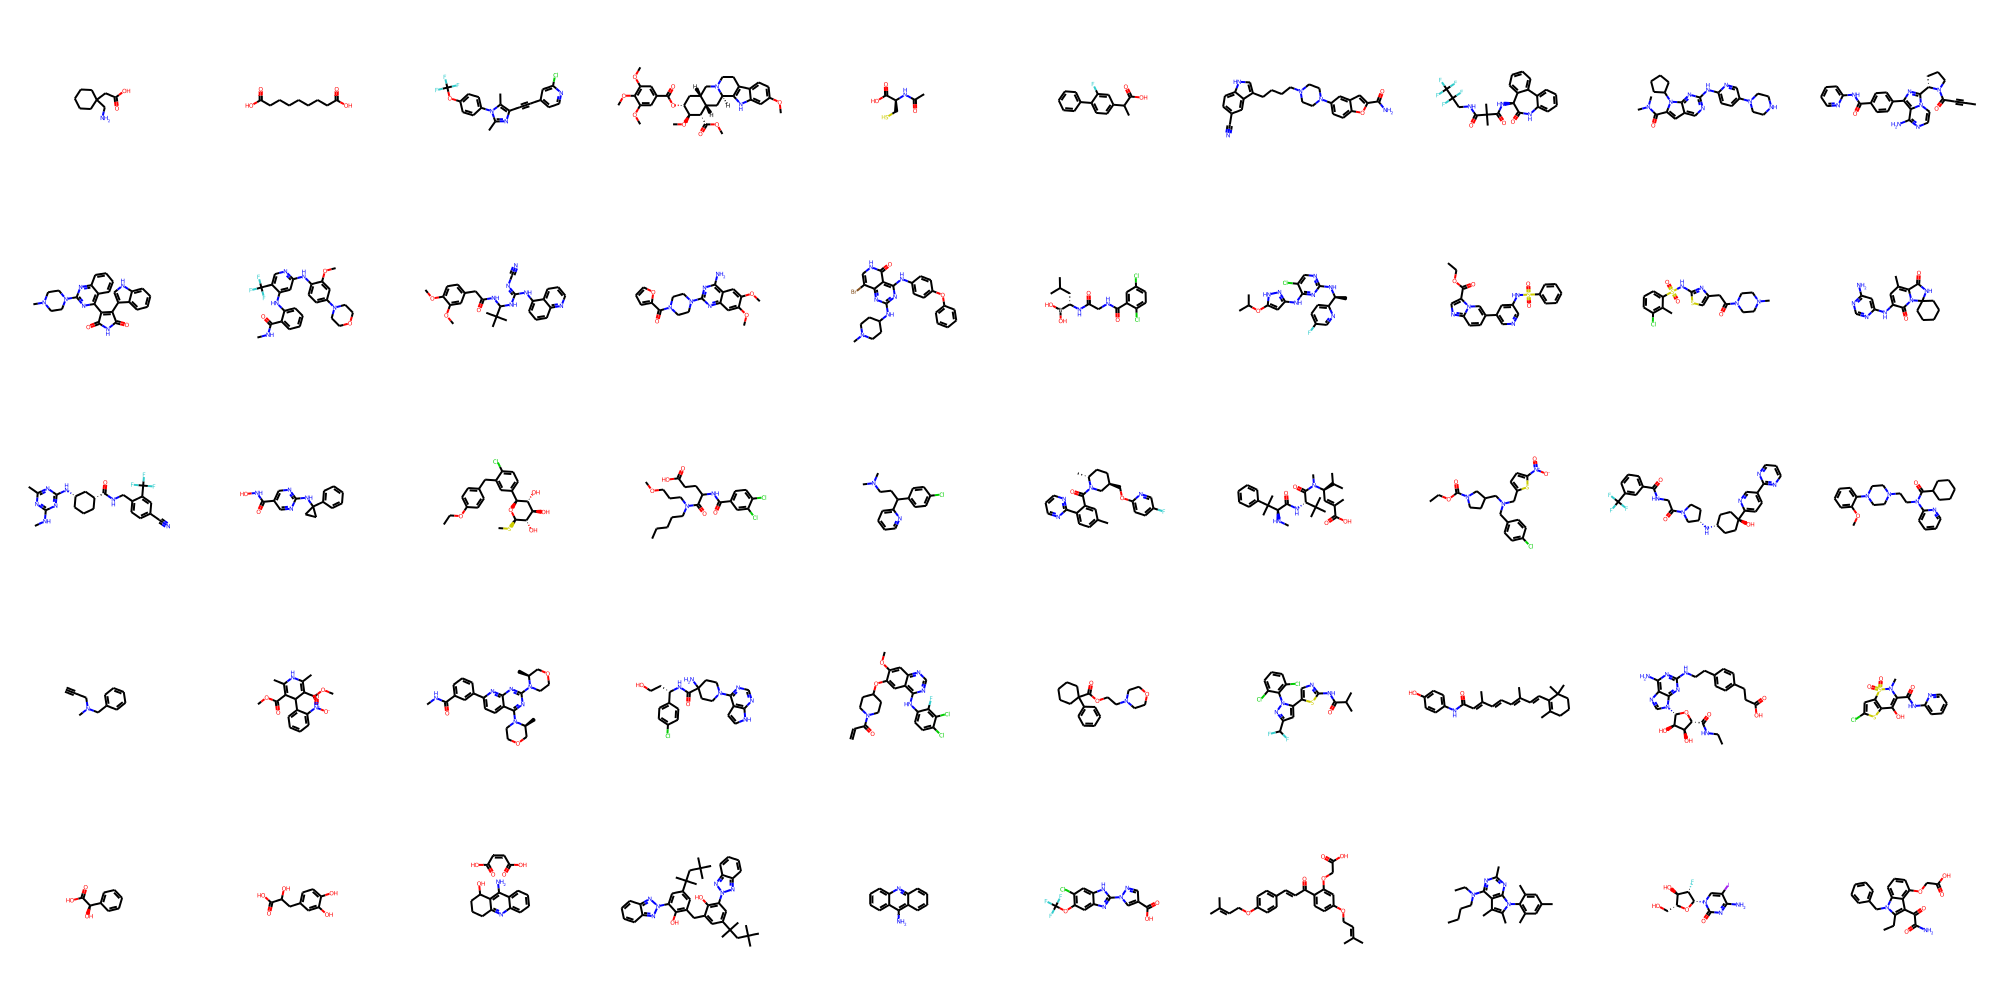

In [5000]:
smiles_list = [

'NCC1(CC(=O)O)CCCCC1',
'O=C(O)CCCCCCCC(=O)O',
'Cc1nc(C#Cc2ccnc(Cl)c2)c(C)n1-c1ccc(OC(F)(F)F)cc1',
'COC(=O)[C@H]1[C@H]2C[C@@H]3c4[nH]c5cc(OC)ccc5c4CCN3C[C@H]2C[C@@H](OC(=O)c2cc(OC)c(OC)c(OC)c2)[C@@H]1OC',
'CC(=O)N[C@@H](CS)C(=O)O',
'CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1',
'N#Cc1ccc2[nH]cc(CCCCN3CCN(c4ccc5oc(C(N)=O)cc5c4)CC3)c2c1',
'CC(C)(C(=O)NCC(F)(F)C(F)(F)F)C(=O)N[C@@H]1C(=O)Nc2ccccc2-c2ccccc21',
'CN(C)C(=O)c1cc2cnc(Nc3ccc(N4CCNCC4)cn3)nc2n1C1CCCC1',
'CC#CC(=O)N1CCC[C@H]1c1nc(-c2ccc(C(=O)Nc3ccccn3)cc2)c2c(N)nccn12',
'CN1CCN(c2nc(C3=C(c4c[nH]c5ccccc45)C(=O)NC3=O)c3ccccc3n2)CC1',
'CNC(=O)c1ccccc1Nc1cc(Nc2ccc(N3CCOCC3)cc2OC)ncc1C(F)(F)F',
'COc1ccc(CC(=O)NC(N/C(=N/C#N)Nc2cccc3ncccc23)C(C)(C)C)cc1OC',
'COc1cc2nc(N3CCN(C(=O)c4ccco4)CC3)nc(N)c2cc1OC',
'CN1CCC(Nc2nc(Nc3ccc(Oc4ccccc4)cc3)c3c(=O)[nH]cc(Br)c3n2)CC1',
'CC(C)C[C@H](NC(=O)CNC(=O)c1cc(Cl)ccc1Cl)B(O)O',
'CC(C)Oc1cc(Nc2nc(N[C@@H](C)c3ccc(F)cn3)ncc2Cl)n[nH]1',
'CCOC(=O)c1cnc2ccc(-c3cncc(NS(=O)(=O)c4ccccc4)c3)cn12',
'Cc1c(Cl)cccc1S(=O)(=O)Nc1nc(CC(=O)N2CCN(C)CC2)cs1',
'Cc1cc(Nc2cc(N)ncn2)c(=O)n2c1C(=O)NC21CCCCC1',
'CNc1nc(C)nc(N[C@H]2CCC[C@@H](C(=O)NCc3ccc(C#N)cc3C(F)(F)F)C2)n1',
'O=C(NO)c1cnc(NC2(c3ccccc3)CC2)nc1',
'CCOc1ccc(Cc2cc([C@@H]3O[C@H](SC)[C@@H](O)[C@H](O)[C@H]3O)ccc2Cl)cc1',
'CCCCCN(CCCOC)C(=O)C(CCC(=O)O)NC(=O)c1ccc(Cl)c(Cl)c1',
'CN(C)CCC(c1ccc(Cl)cc1)c1ccccn1',
'Cc1ccc(-c2ncccn2)c(C(=O)N2C[C@H](COc3ccc(F)cn3)CC[C@H]2C)c1',
'CN[C@H](C(=O)N[C@H](C(=O)N(C)[C@H](/C=C(\C)C(=O)O)C(C)C)C(C)(C)C)C(C)(C)c1ccccc1',
'CCOC(=O)N1CCC(CN(Cc2ccc(Cl)cc2)Cc2ccc([N+](=O)[O-])s2)C1',
'O=C(NCC(=O)N1CC[C@H](N[C@H]2CC[C@@](O)(c3ccc(-c4ncccn4)cn3)CC2)C1)c1cccc(C(F)(F)F)c1',
'COc1ccccc1N1CCN(CCN(C(=O)C2CCCCC2)c2ccccn2)CC1',
'C#CCN(C)Cc1ccccc1',
'COC(=O)C1=C(C)NC(C)=C(C(=O)OC)C1c1ccccc1[N+](=O)[O-]',
'CNC(=O)c1cccc(-c2ccc3c(N4CCOC[C@@H]4C)nc(N4CCOC[C@@H]4C)nc3n2)c1',
'NC1(C(=O)N[C@@H](CCO)c2ccc(Cl)cc2)CCN(c2ncnc3[nH]ccc23)CC1',
'C=CC(=O)N1CCC(Oc2cc3c(Nc4ccc(Cl)c(Cl)c4F)ncnc3cc2OC)CC1',
'O=C(OCCN1CCOCC1)C1(c2ccccc2)CCCCC1',
'CC(C)C(=O)Nc1ncc(-c2cc(C(F)F)nn2-c2c(Cl)cccc2Cl)s1',
'CC1=C(/C=C/C(C)=C/C=C/C(C)=C/C(=O)Nc2ccc(O)cc2)C(C)(C)CCC1',
'CCNC(=O)[C@H]1O[C@@H](n2cnc3c(N)nc(NCCc4ccc(CCC(=O)O)cc4)nc32)[C@H](O)[C@@H]1O',
'CN1C(C(=O)Nc2ccccn2)=C(O)c2sc(Cl)cc2S1(=O)=O',
'O=C(O)[C@H](O)c1ccccc1',
'O=C(O)C(O)Cc1ccc(O)c(O)c1',
'Nc1c2c(nc3ccccc13)CCCC2O.O=C(O)/C=C\C(=O)O',
'CC(C)(C)CC(C)(C)c1cc(Cc2cc(C(C)(C)CC(C)(C)C)cc(-n3nc4ccccc4n3)c2O)c(O)c(-n2nc3ccccc3n2)c1',
'Nc1c2ccccc2nc2ccccc12',
'O=C(O)c1cnn(-c2nc3cc(OC(F)(F)F)c(Cl)cc3[nH]2)c1',
'CC(C)=CCOc1ccc(/C=C/C(=O)c2ccc(OCC=C(C)C)cc2OCC(=O)O)cc1',
'CCCCN(CC)c1nc(C)nc2c1c(C)c(C)n2-c1c(C)cc(C)cc1C',
'Nc1nc(=O)n([C@@H]2O[C@H](CO)[C@@H](O)[C@@H]2F)cc1I',
'CCc1c(C(=O)C(N)=O)c2c(OCC(=O)O)cccc2n1Cc1ccccc1',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



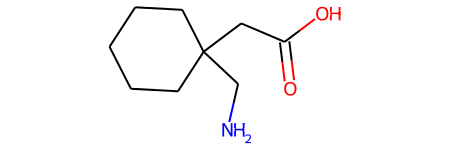

In [5001]:
M1 = mol_list [0]
M1

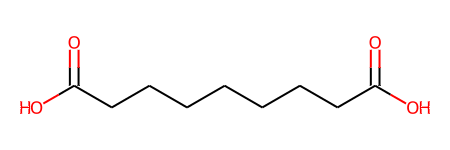

In [5002]:
M2 = mol_list [1]
M2

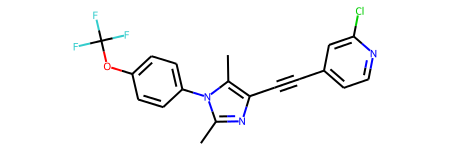

In [5003]:
M3 = mol_list [2]
M3

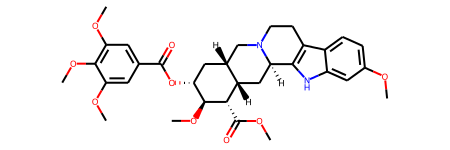

In [5004]:
M4 = mol_list [3]
M4

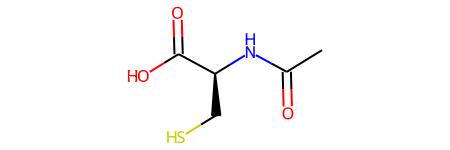

In [5005]:
M5 = mol_list [4]
M5

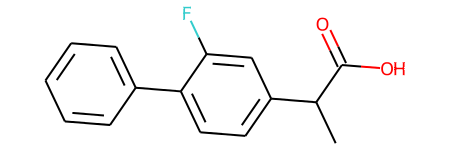

In [5006]:
M6 = mol_list [5]
M6

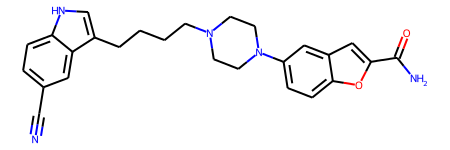

In [5007]:
M7 = mol_list [6]
M7

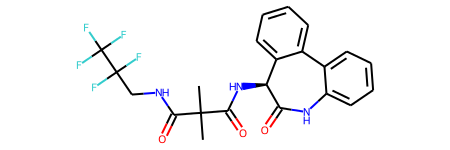

In [5008]:
M8 = mol_list [7]
M8

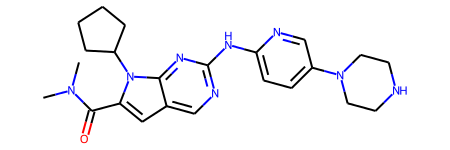

In [5009]:
M9 = mol_list [8]
M9

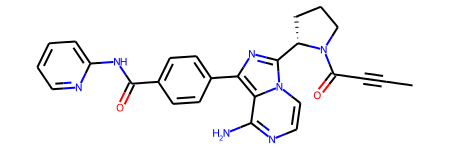

In [5010]:
M10 = mol_list [9]
M10

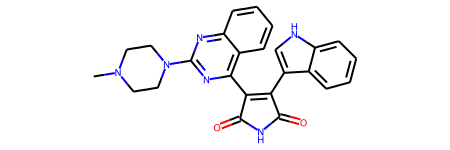

In [5011]:
M11 = mol_list [10]
M11

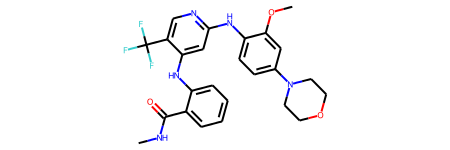

In [5012]:
M12 = mol_list [11]
M12

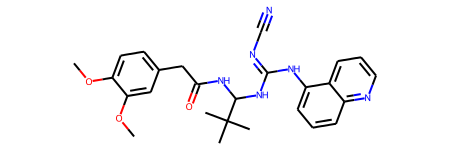

In [5013]:
M13 = mol_list [12]
M13

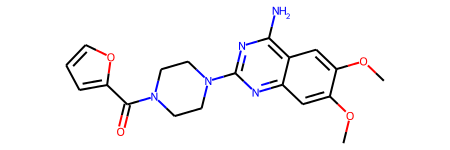

In [5014]:
M14 = mol_list [13]
M14

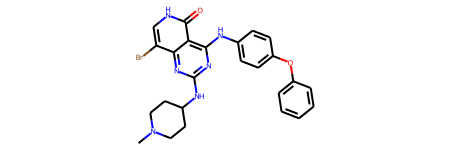

In [5015]:
M15 = mol_list [14]
M15

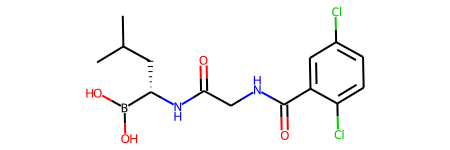

In [5016]:
M16 = mol_list [15]
M16

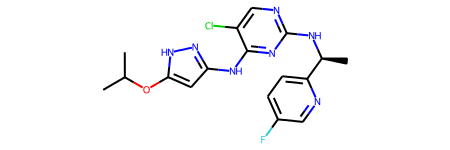

In [5017]:
M17 = mol_list [16]
M17

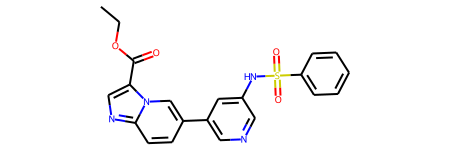

In [5018]:
M18 = mol_list [17]
M18

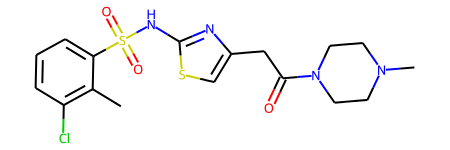

In [5019]:
M19 = mol_list [18]
M19

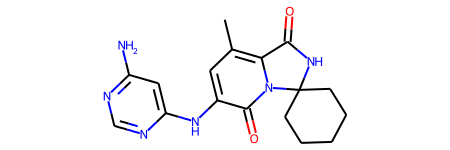

In [5020]:
M20 = mol_list [19]
M20

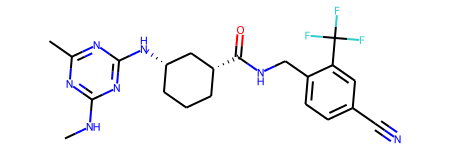

In [5021]:
M21 = mol_list [20]
M21

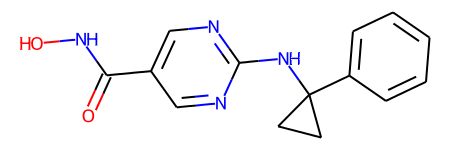

In [5022]:
M22 = mol_list [21]
M22

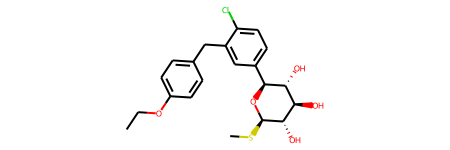

In [5023]:
M23 = mol_list [22]
M23

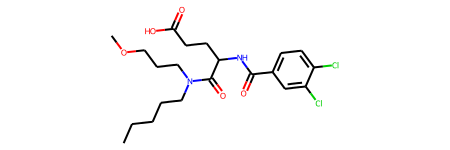

In [5024]:
M24 = mol_list [23]
M24

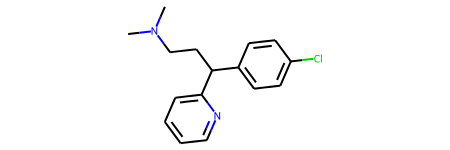

In [5025]:
M25 = mol_list [24]
M25

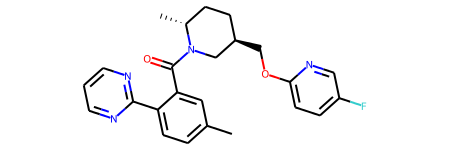

In [5026]:
M26 = mol_list [25]
M26

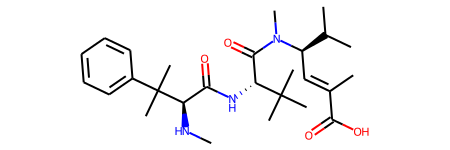

In [5027]:
M27 = mol_list [26]
M27

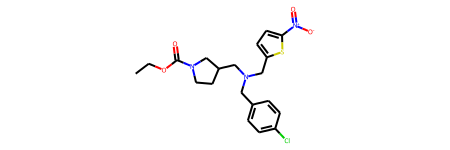

In [5028]:
M28 = mol_list [27]
M28

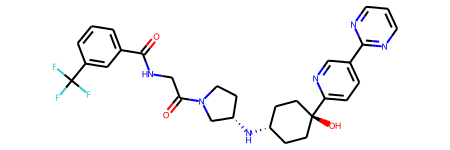

In [5029]:
M29 = mol_list [28]
M29

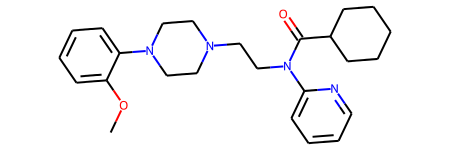

In [5030]:
M30 = mol_list [29]
M30

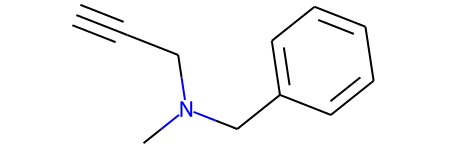

In [5031]:
M31 = mol_list [30]
M31

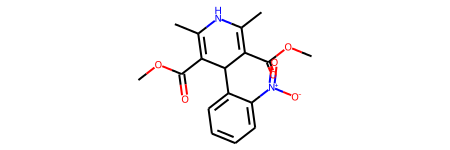

In [5032]:
M32 = mol_list [31]
M32

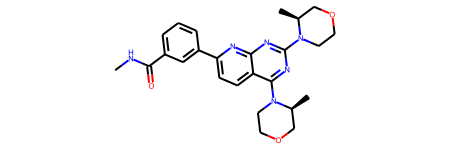

In [5033]:
M33 = mol_list [32]
M33

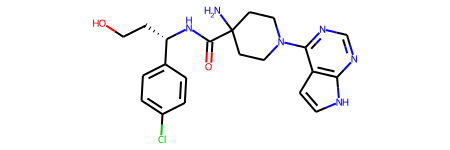

In [5034]:
M34 = mol_list [33]
M34

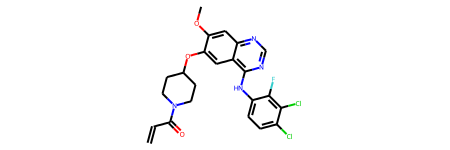

In [5035]:
M35 = mol_list [34]
M35

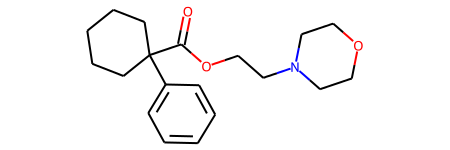

In [5036]:
M36 = mol_list [35]
M36

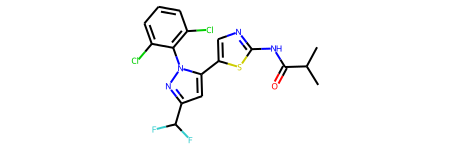

In [5037]:
M37= mol_list [36]
M37

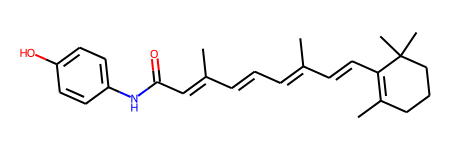

In [5038]:
M38= mol_list [37]
M38

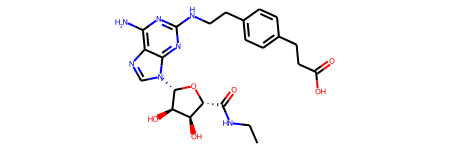

In [5039]:
M39= mol_list [38]
M39

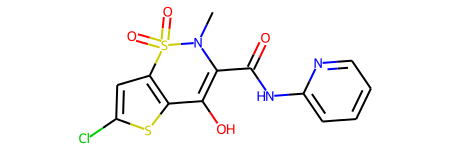

In [5040]:
M40= mol_list [39]
M40

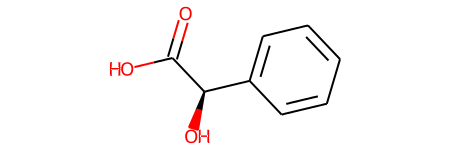

In [5041]:
M41= mol_list [40]
M41

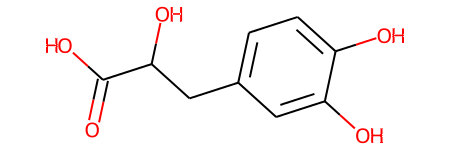

In [5042]:
M42= mol_list [41]
M42

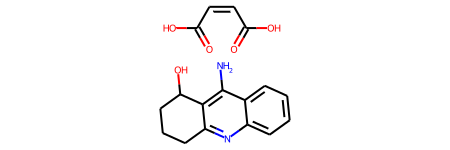

In [5043]:
M43= mol_list [42]
M43

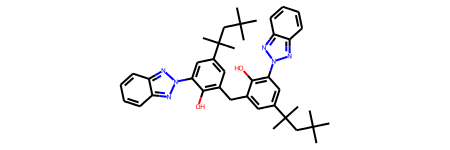

In [5044]:
M44= mol_list [43]
M44

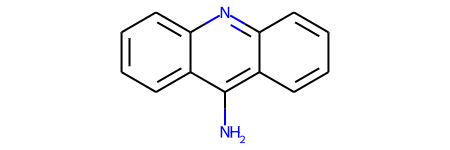

In [5045]:
M45= mol_list [44]
M45

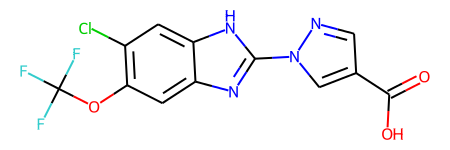

In [5046]:
M46= mol_list [45]
M46

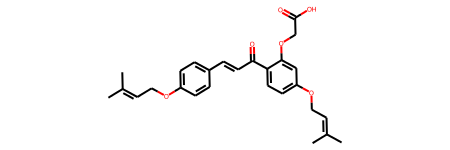

In [5047]:
M47= mol_list [46]
M47

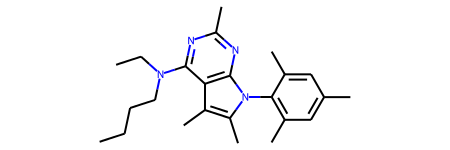

In [5048]:
M48= mol_list [47]
M48

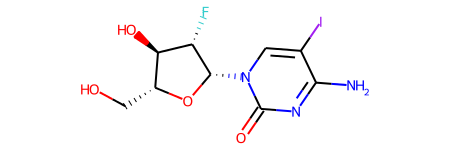

In [5049]:
M49= mol_list [48]
M49

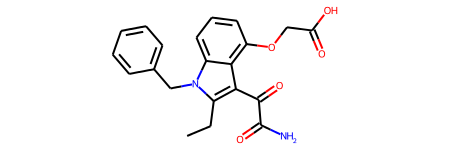

In [5050]:
M50= mol_list [49]
M50

In [5051]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[2,
 4,
 36,
 59,
 80,
 138,
 147,
 195,
 333,
 345,
 389,
 474,
 614,
 650,
 713,
 788,
 807,
 838,
 893,
 901,
 926,
 981]

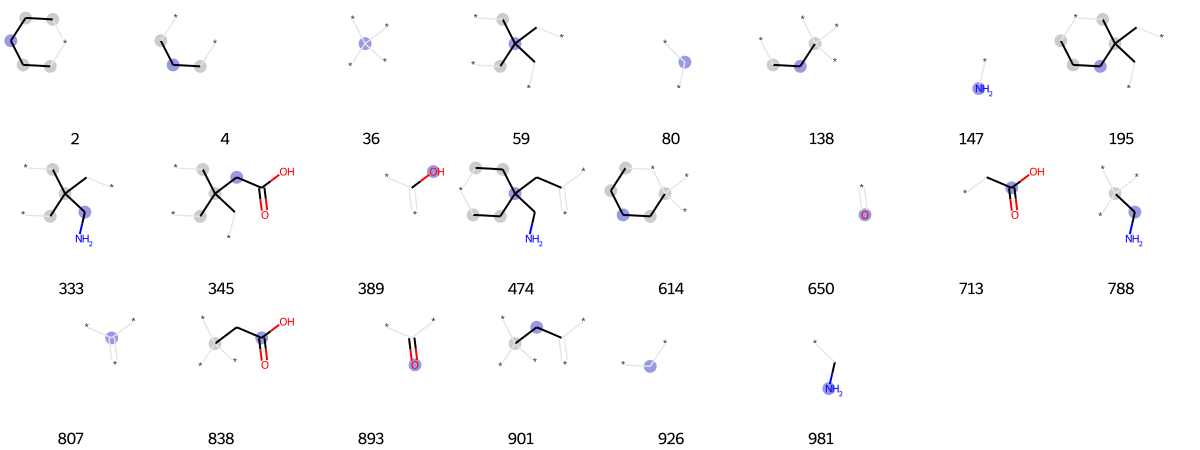

In [5052]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [5053]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[80, 86, 119, 243, 263, 389, 540, 650, 713, 807, 887, 893]

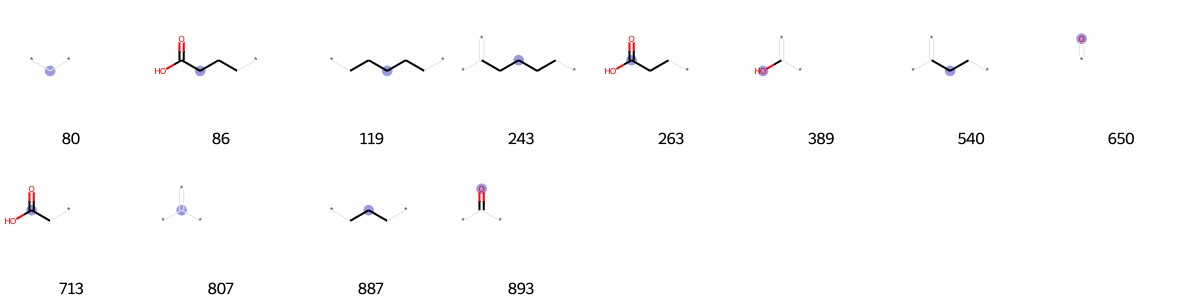

In [5054]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [5055]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[33,
 58,
 75,
 102,
 114,
 125,
 145,
 189,
 233,
 249,
 317,
 322,
 356,
 361,
 378,
 385,
 410,
 428,
 429,
 430,
 548,
 561,
 563,
 612,
 659,
 674,
 695,
 698,
 711,
 718,
 726,
 734,
 742,
 787,
 801,
 804,
 815,
 831,
 838,
 842,
 849,
 875,
 904,
 917,
 935,
 965,
 969,
 1010]

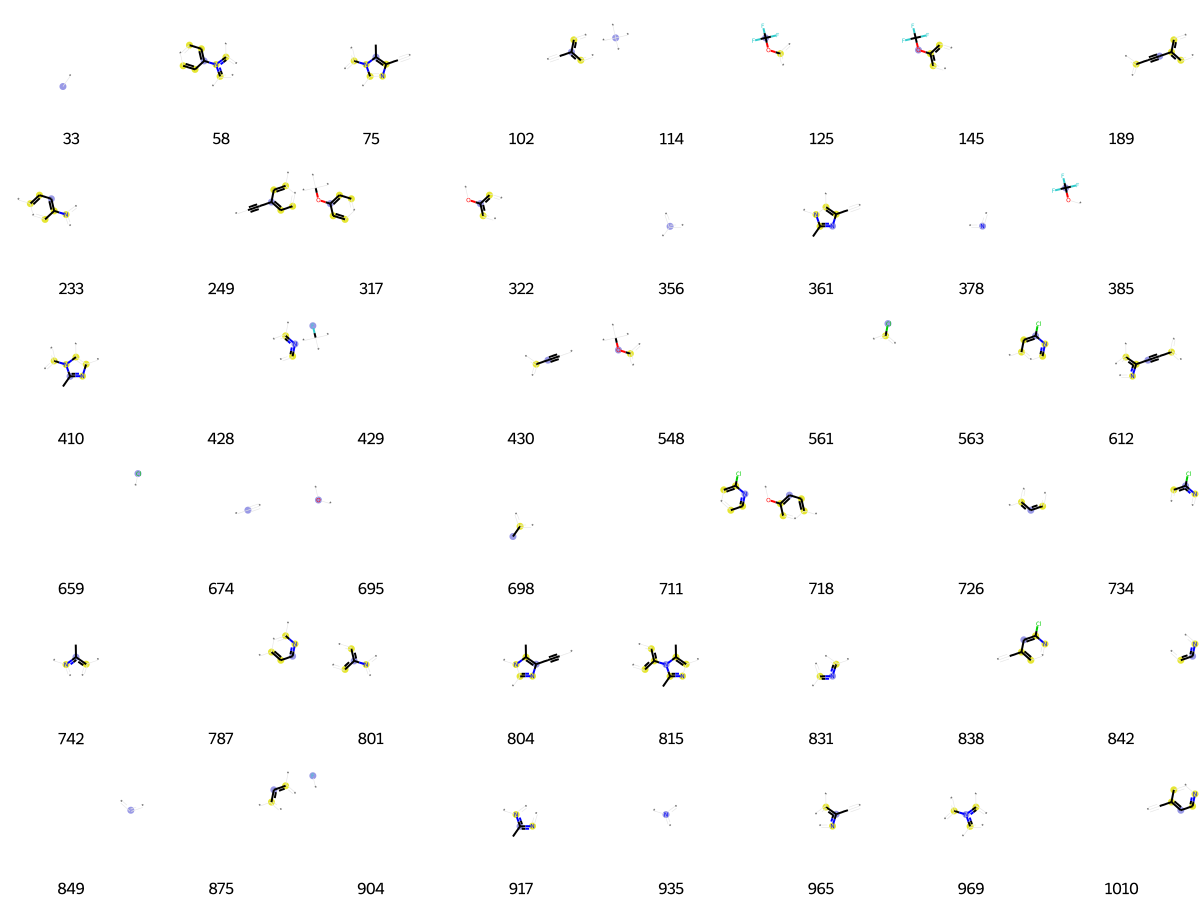

In [5056]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [5057]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[33,
 42,
 46,
 62,
 83,
 90,
 102,
 119,
 128,
 145,
 172,
 181,
 249,
 268,
 282,
 288,
 302,
 303,
 322,
 325,
 333,
 335,
 352,
 356,
 361,
 428,
 456,
 500,
 512,
 534,
 575,
 585,
 622,
 625,
 650,
 674,
 677,
 695,
 709,
 714,
 718,
 721,
 726,
 739,
 740,
 781,
 791,
 798,
 807,
 829,
 830,
 841,
 844,
 849,
 868,
 875,
 893,
 912,
 913,
 922,
 926,
 935,
 937,
 946,
 948,
 956,
 978,
 1019]

In [5058]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[1,
 33,
 80,
 117,
 128,
 229,
 245,
 321,
 389,
 435,
 600,
 650,
 675,
 736,
 798,
 807,
 820,
 840,
 865,
 893,
 1017]

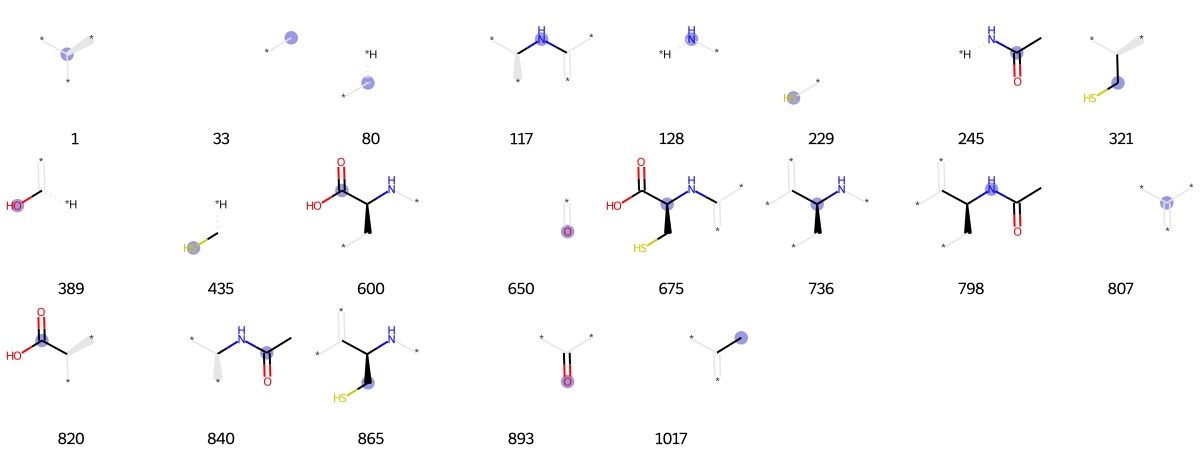

In [5059]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [5060]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[1,
 33,
 64,
 65,
 83,
 136,
 175,
 222,
 233,
 283,
 316,
 341,
 352,
 356,
 389,
 650,
 680,
 699,
 726,
 736,
 807,
 816,
 820,
 829,
 849,
 875,
 893,
 900,
 904,
 921,
 997]

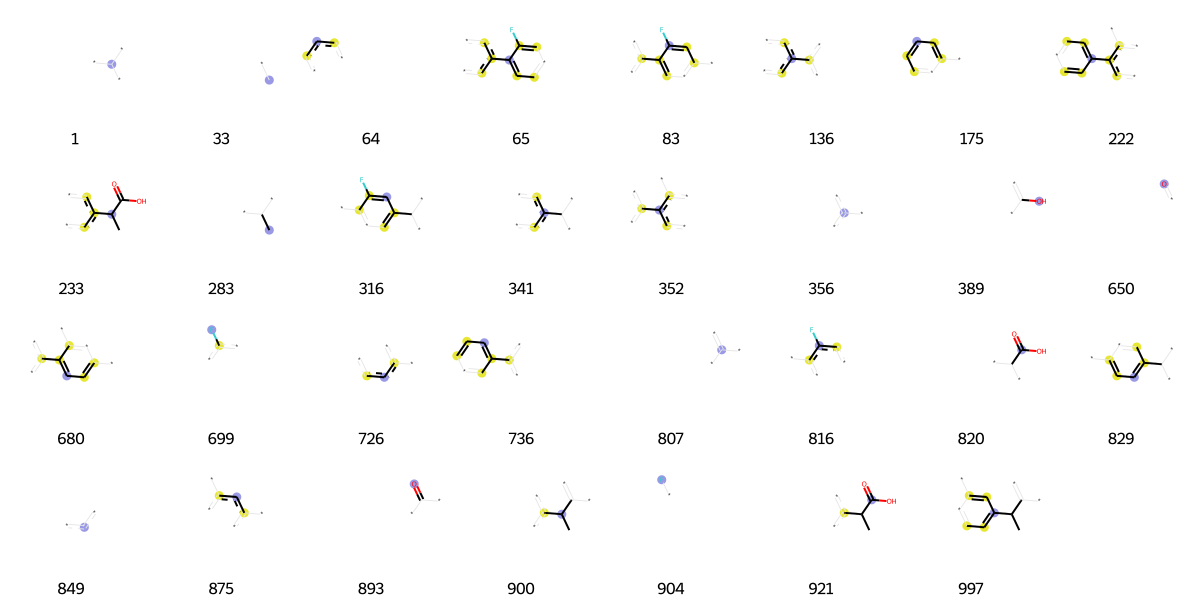

In [5061]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [5062]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[74,
 80,
 90,
 102,
 105,
 112,
 119,
 121,
 140,
 147,
 160,
 219,
 233,
 305,
 309,
 325,
 328,
 333,
 356,
 360,
 364,
 407,
 422,
 456,
 458,
 476,
 484,
 496,
 503,
 580,
 650,
 653,
 656,
 674,
 677,
 687,
 726,
 728,
 730,
 740,
 767,
 784,
 786,
 790,
 801,
 806,
 807,
 831,
 849,
 855,
 875,
 887,
 888,
 893,
 913,
 915,
 926,
 930,
 935,
 942,
 951]

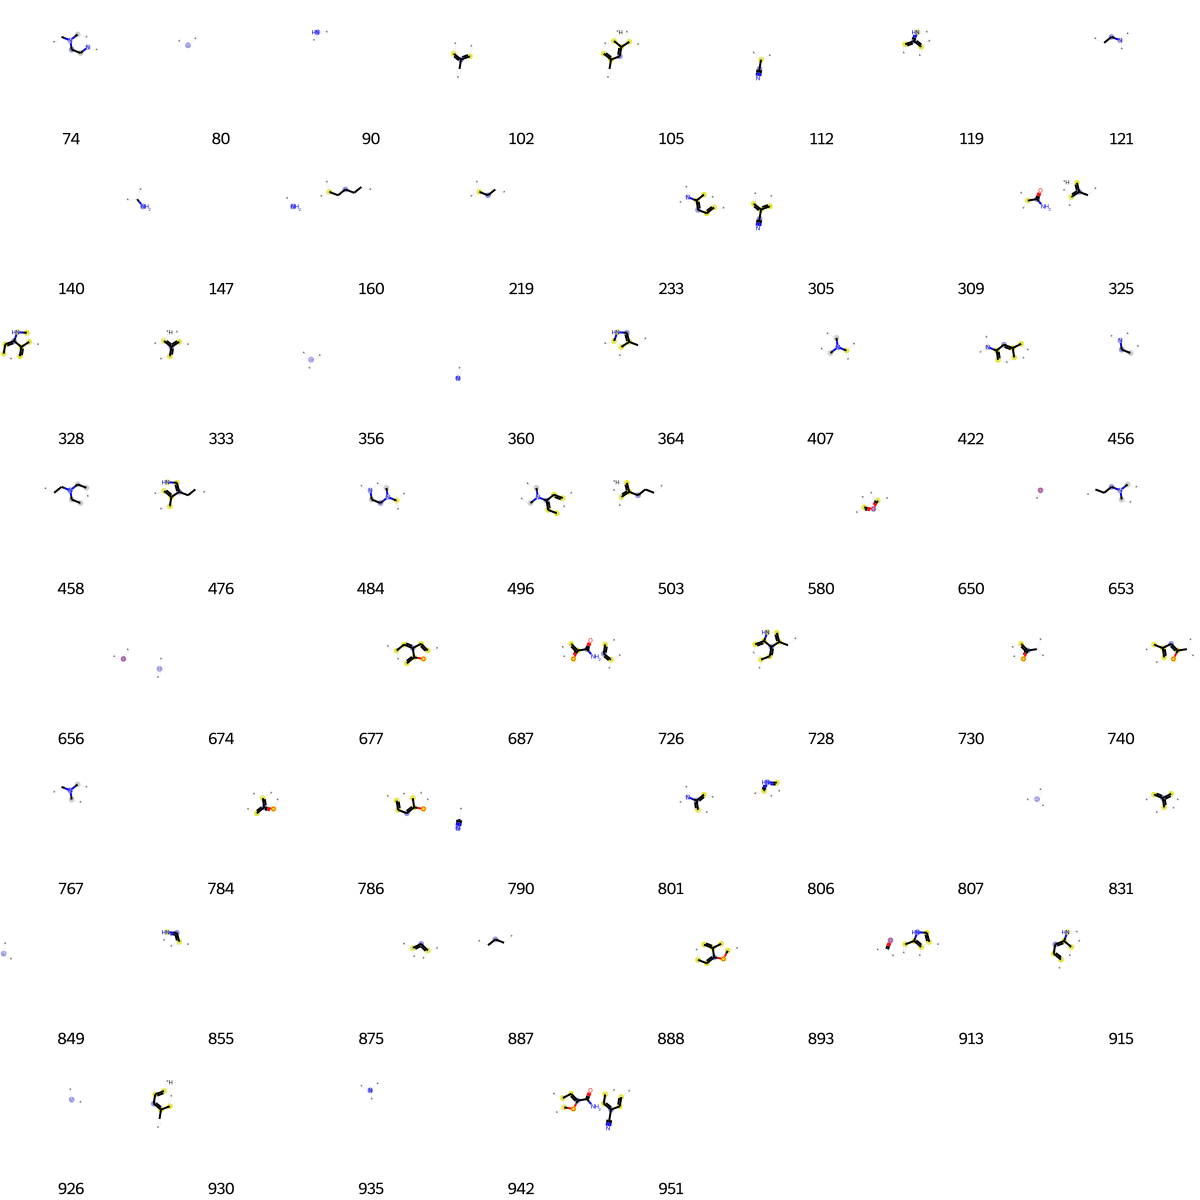

In [5063]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [5064]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[3,
 7,
 10,
 28,
 33,
 36,
 38,
 59,
 64,
 80,
 90,
 114,
 128,
 142,
 166,
 175,
 197,
 273,
 292,
 314,
 320,
 326,
 348,
 352,
 356,
 371,
 387,
 392,
 396,
 429,
 446,
 472,
 585,
 650,
 651,
 660,
 726,
 807,
 849,
 856,
 867,
 886,
 893,
 904,
 958,
 984,
 1001,
 1009,
 1019]

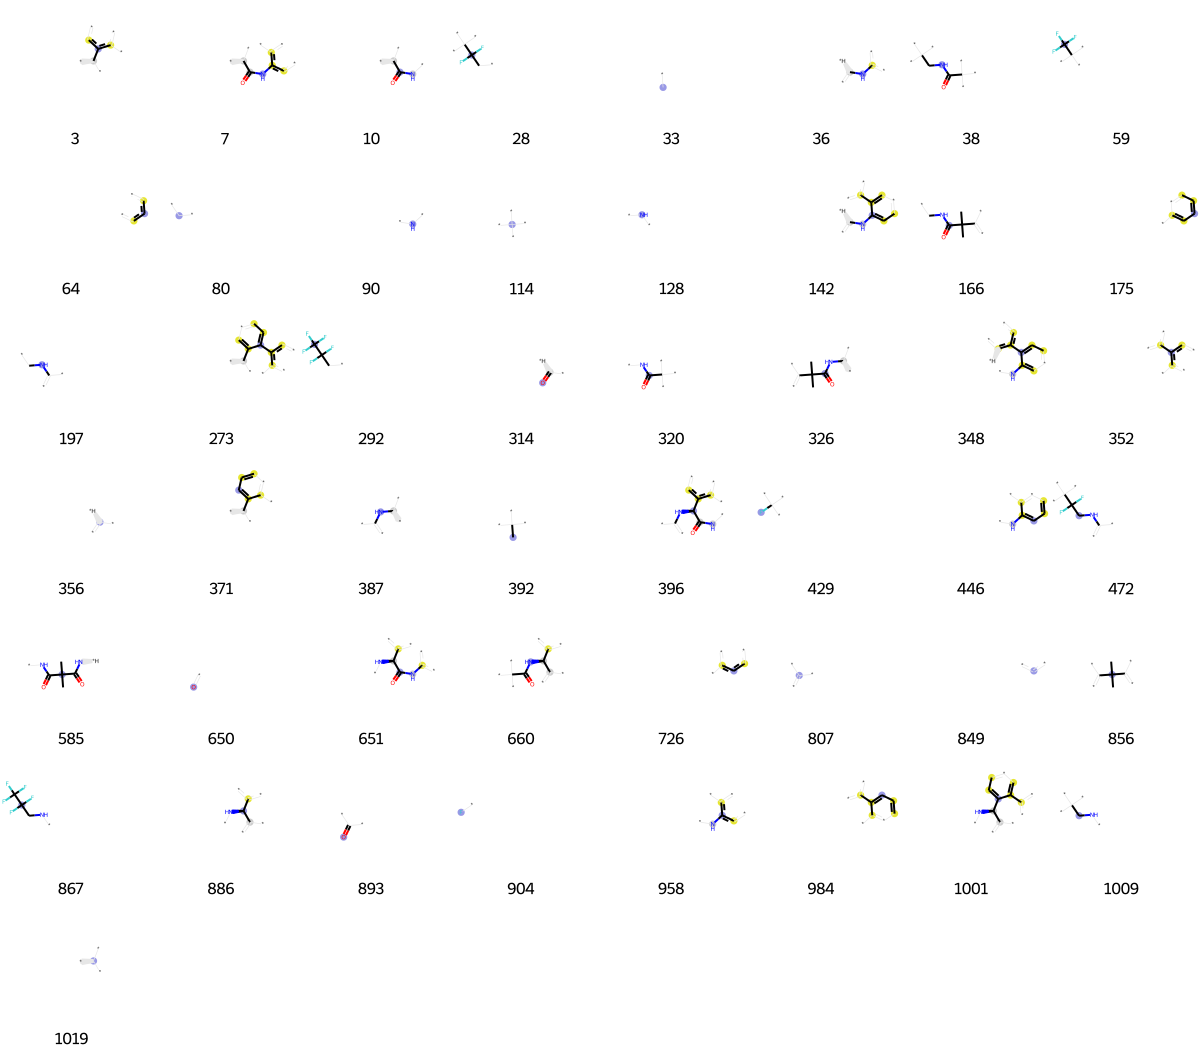

In [5065]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [5066]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[4,
 20,
 33,
 36,
 37,
 75,
 90,
 128,
 139,
 152,
 197,
 222,
 233,
 244,
 284,
 301,
 305,
 356,
 369,
 378,
 407,
 428,
 456,
 458,
 488,
 491,
 492,
 507,
 511,
 541,
 544,
 558,
 629,
 650,
 672,
 687,
 726,
 770,
 781,
 800,
 801,
 804,
 807,
 831,
 849,
 875,
 881,
 886,
 890,
 893,
 910,
 926,
 931,
 934,
 935,
 967,
 969,
 996,
 1019,
 1022]

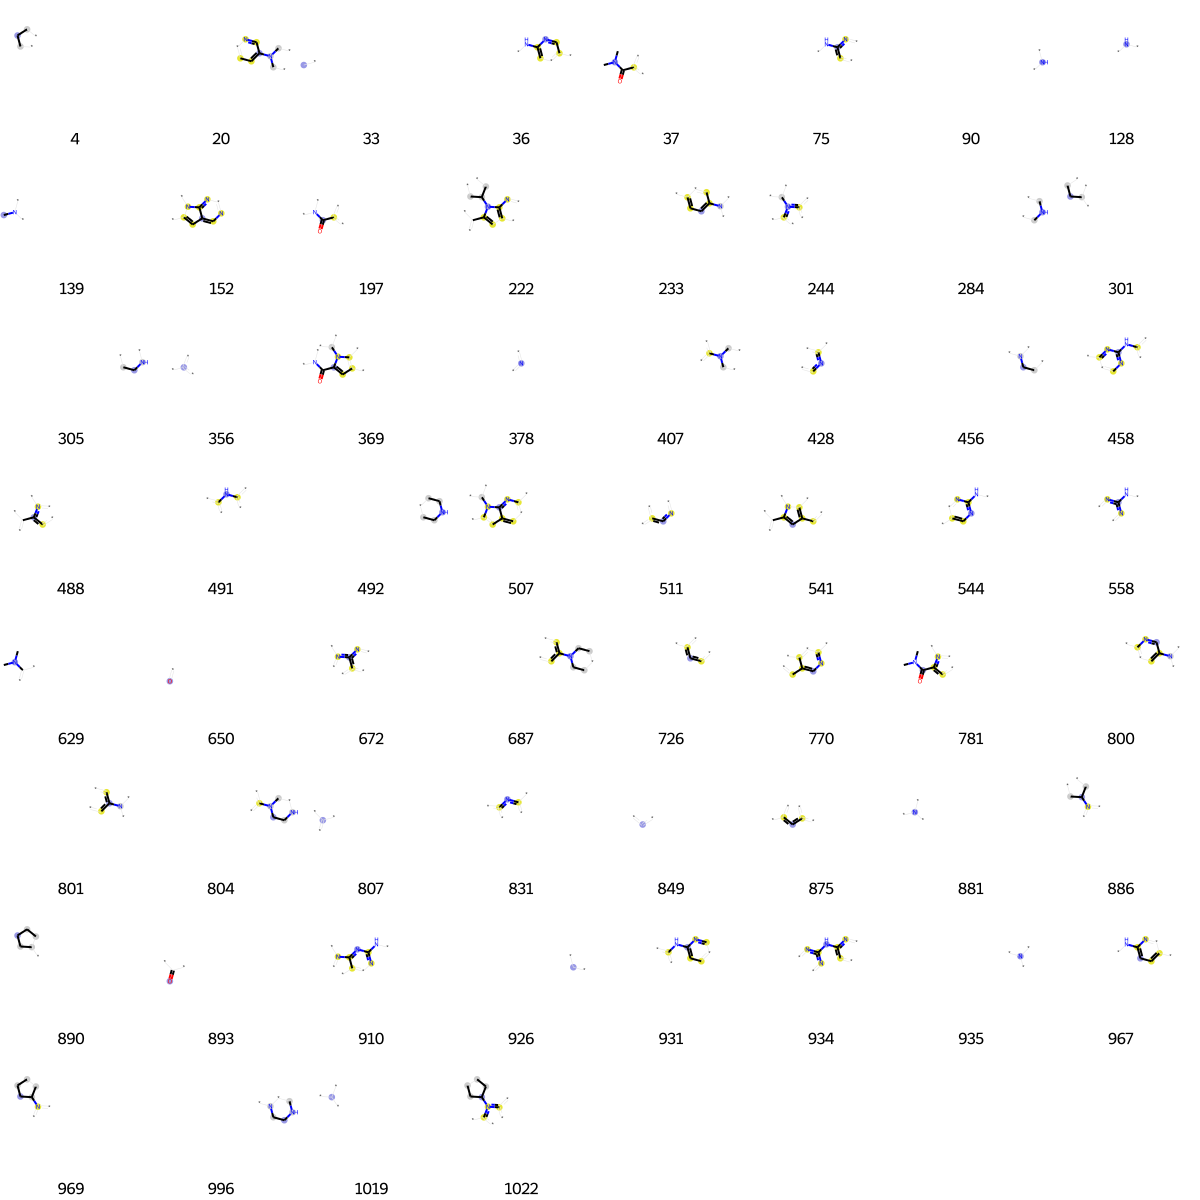

In [5067]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [5068]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[4,
 33,
 46,
 64,
 75,
 77,
 117,
 128,
 131,
 136,
 144,
 147,
 175,
 193,
 221,
 231,
 242,
 267,
 276,
 288,
 301,
 312,
 315,
 323,
 351,
 356,
 361,
 378,
 387,
 407,
 416,
 428,
 433,
 435,
 446,
 448,
 456,
 471,
 486,
 574,
 575,
 597,
 641,
 650,
 669,
 673,
 674,
 690,
 726,
 762,
 771,
 792,
 807,
 822,
 831,
 842,
 849,
 888,
 893,
 896,
 924,
 926,
 935,
 945,
 993,
 1019]

In [5069]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[14,
 33,
 36,
 64,
 73,
 90,
 119,
 121,
 175,
 207,
 212,
 218,
 232,
 289,
 314,
 323,
 328,
 333,
 335,
 352,
 356,
 378,
 389,
 407,
 439,
 456,
 464,
 483,
 484,
 546,
 549,
 570,
 633,
 642,
 644,
 650,
 726,
 759,
 806,
 828,
 831,
 834,
 838,
 849,
 855,
 891,
 913,
 926,
 935]

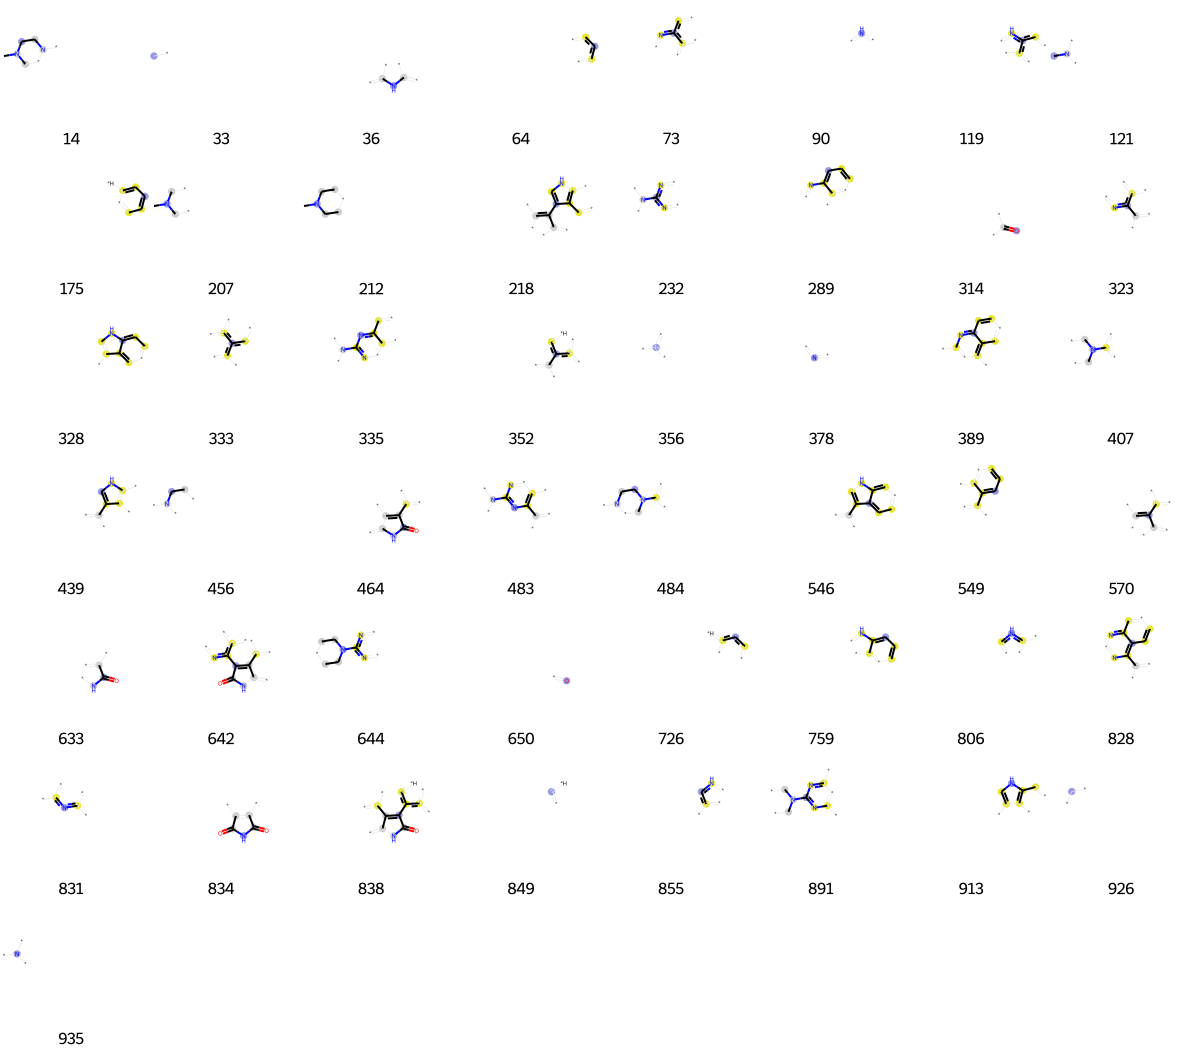

In [5070]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [5071]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[33,
 36,
 64,
 65,
 75,
 84,
 90,
 94,
 114,
 128,
 175,
 200,
 206,
 218,
 233,
 249,
 262,
 345,
 356,
 377,
 378,
 381,
 406,
 407,
 417,
 419,
 423,
 428,
 429,
 456,
 486,
 491,
 496,
 500,
 511,
 512,
 523,
 650,
 656,
 672,
 687,
 695,
 702,
 726,
 801,
 807,
 809,
 813,
 832,
 841,
 849,
 875,
 893,
 904,
 926,
 930,
 935,
 946,
 950,
 967,
 984,
 1014,
 1019,
 1022]

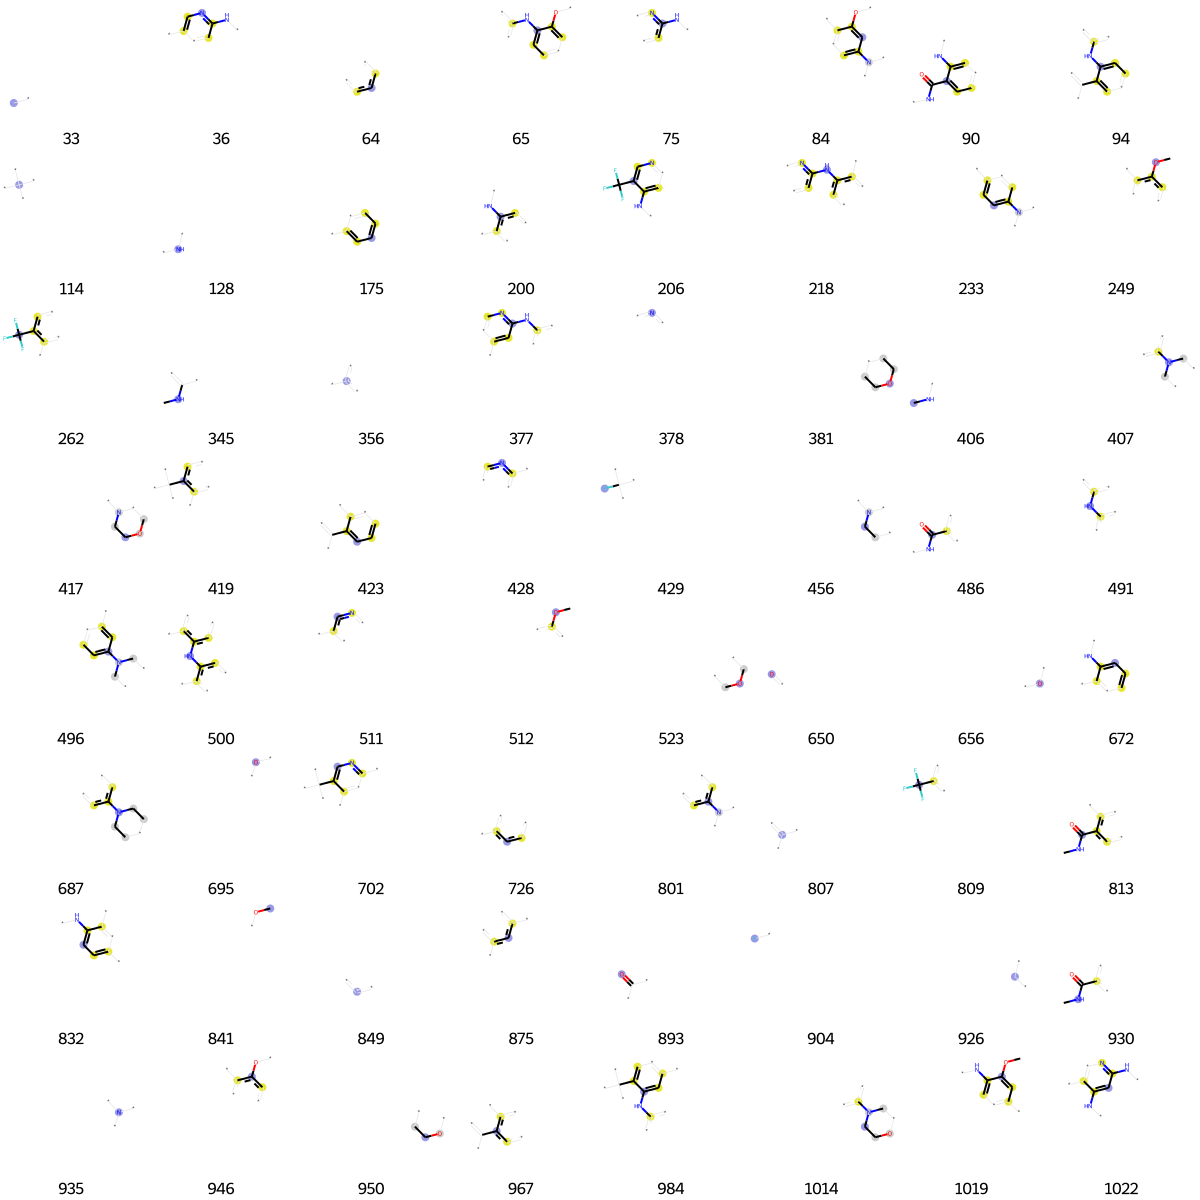

In [5072]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [5073]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[1,
 3,
 15,
 19,
 33,
 41,
 64,
 73,
 80,
 94,
 114,
 117,
 128,
 136,
 140,
 200,
 221,
 249,
 289,
 310,
 322,
 325,
 333,
 356,
 357,
 360,
 363,
 378,
 392,
 428,
 448,
 488,
 512,
 549,
 605,
 613,
 620,
 629,
 636,
 640,
 643,
 650,
 672,
 674,
 695,
 705,
 725,
 726,
 730,
 735,
 742,
 749,
 790,
 792,
 798,
 807,
 841,
 842,
 849,
 875,
 893,
 943,
 946,
 975]

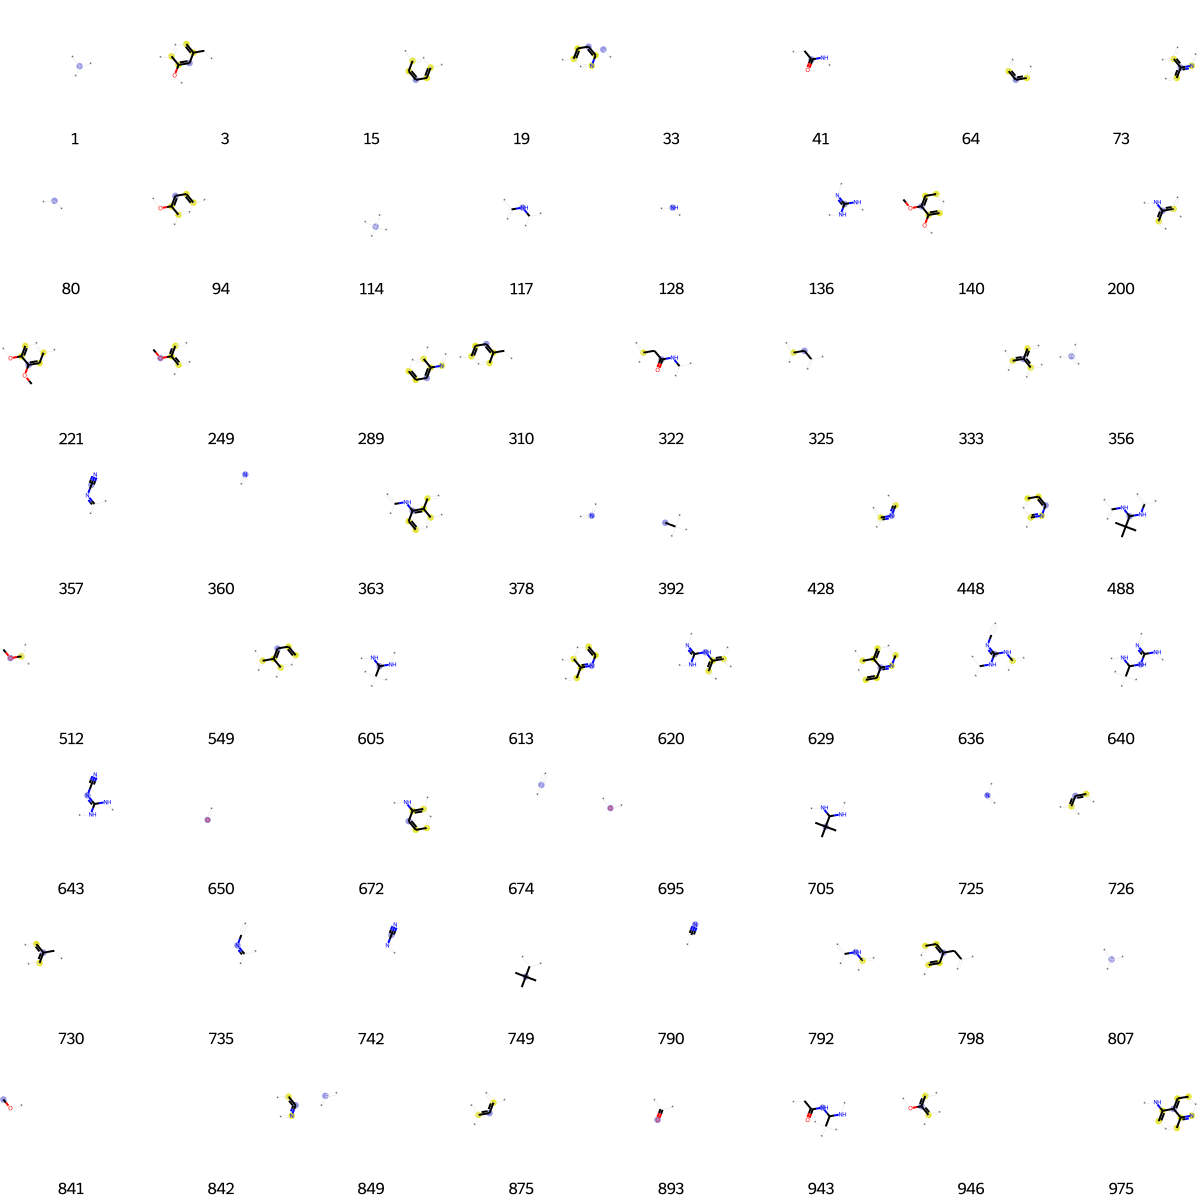

In [5074]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [5075]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[33,
 42,
 64,
 73,
 82,
 147,
 209,
 212,
 221,
 232,
 237,
 249,
 333,
 335,
 356,
 378,
 405,
 407,
 433,
 435,
 456,
 469,
 474,
 480,
 484,
 500,
 512,
 565,
 621,
 624,
 644,
 650,
 656,
 695,
 726,
 730,
 780,
 787,
 807,
 831,
 841,
 849,
 875,
 891,
 893,
 902,
 926,
 935,
 942,
 946,
 985]

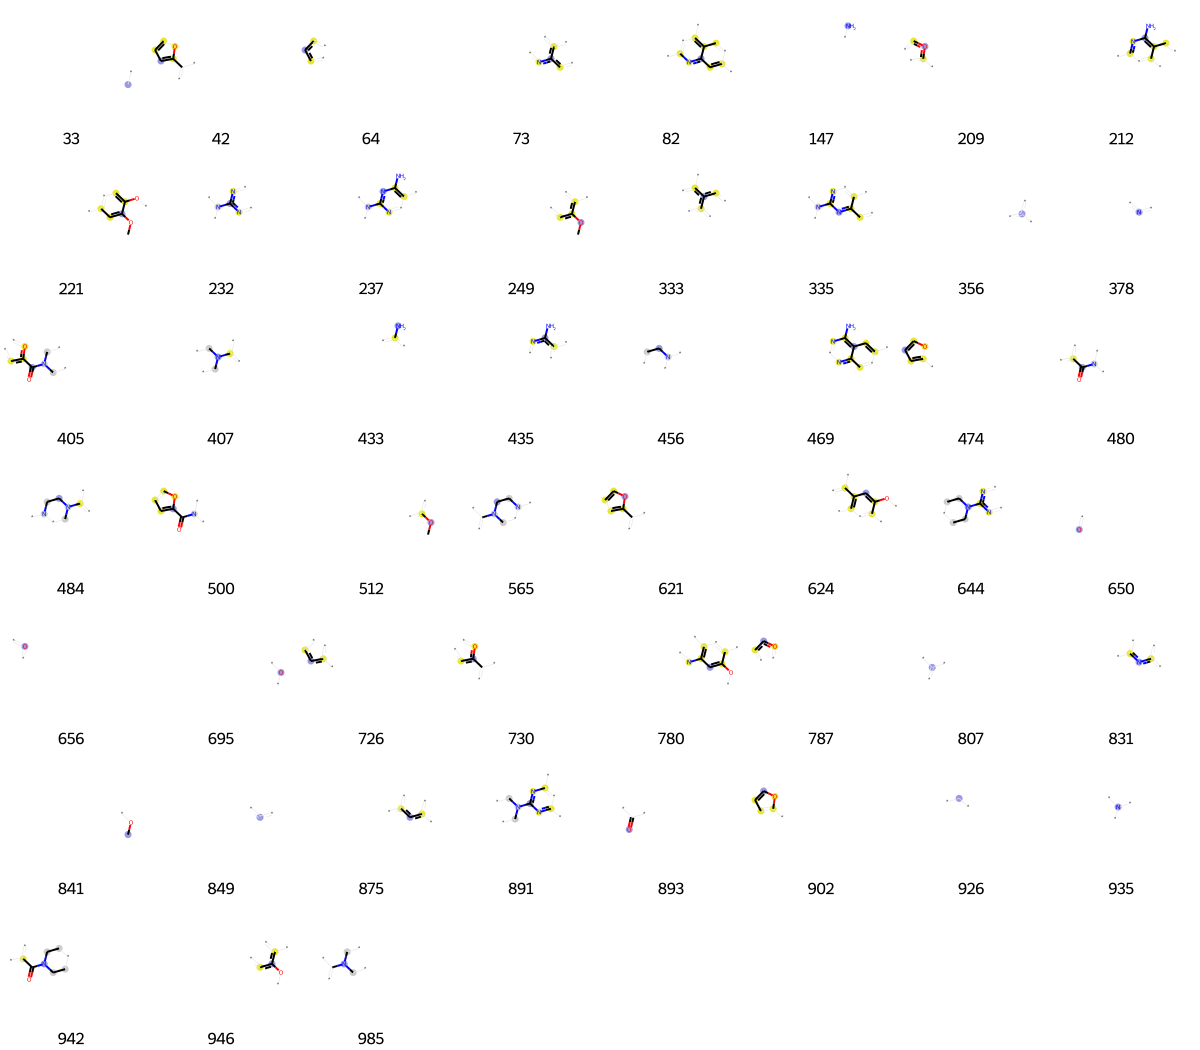

In [5076]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [5077]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[11,
 33,
 64,
 79,
 90,
 119,
 121,
 128,
 144,
 175,
 182,
 190,
 191,
 193,
 207,
 212,
 228,
 240,
 301,
 314,
 322,
 342,
 350,
 356,
 378,
 389,
 456,
 491,
 500,
 558,
 562,
 565,
 593,
 607,
 610,
 650,
 695,
 700,
 708,
 718,
 726,
 728,
 750,
 754,
 806,
 831,
 833,
 843,
 848,
 849,
 851,
 855,
 888,
 926,
 935,
 960,
 993,
 1010,
 1019]

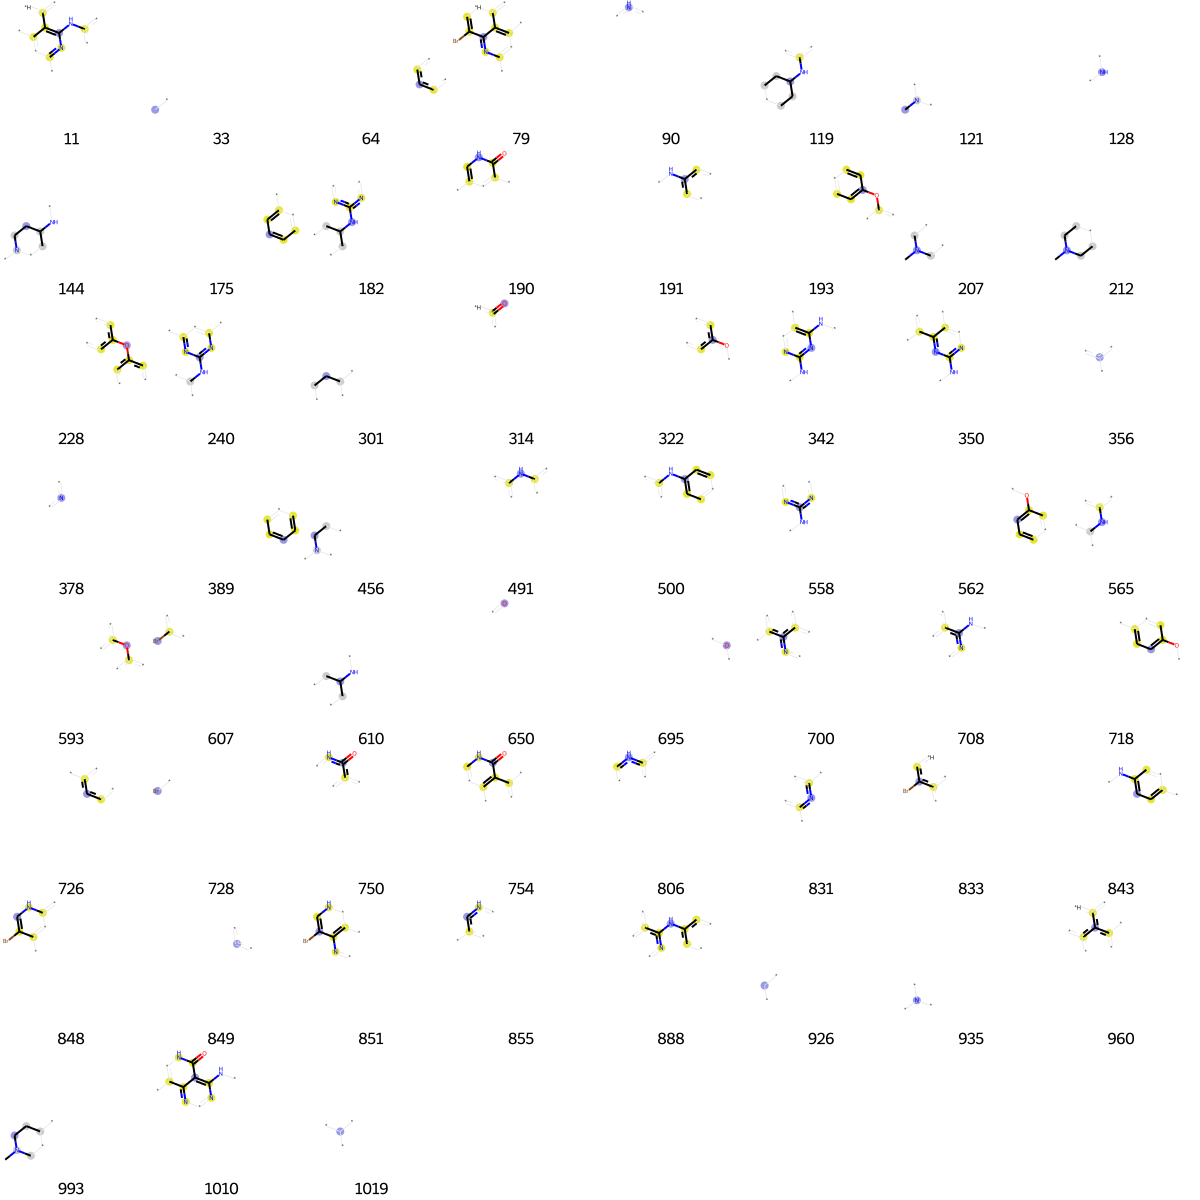

In [5078]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [5079]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[1,
 33,
 41,
 80,
 117,
 128,
 165,
 166,
 175,
 197,
 216,
 227,
 271,
 283,
 293,
 318,
 352,
 356,
 366,
 416,
 486,
 524,
 541,
 561,
 650,
 659,
 666,
 680,
 691,
 726,
 759,
 807,
 816,
 822,
 823,
 849,
 875,
 893,
 897,
 948,
 967]

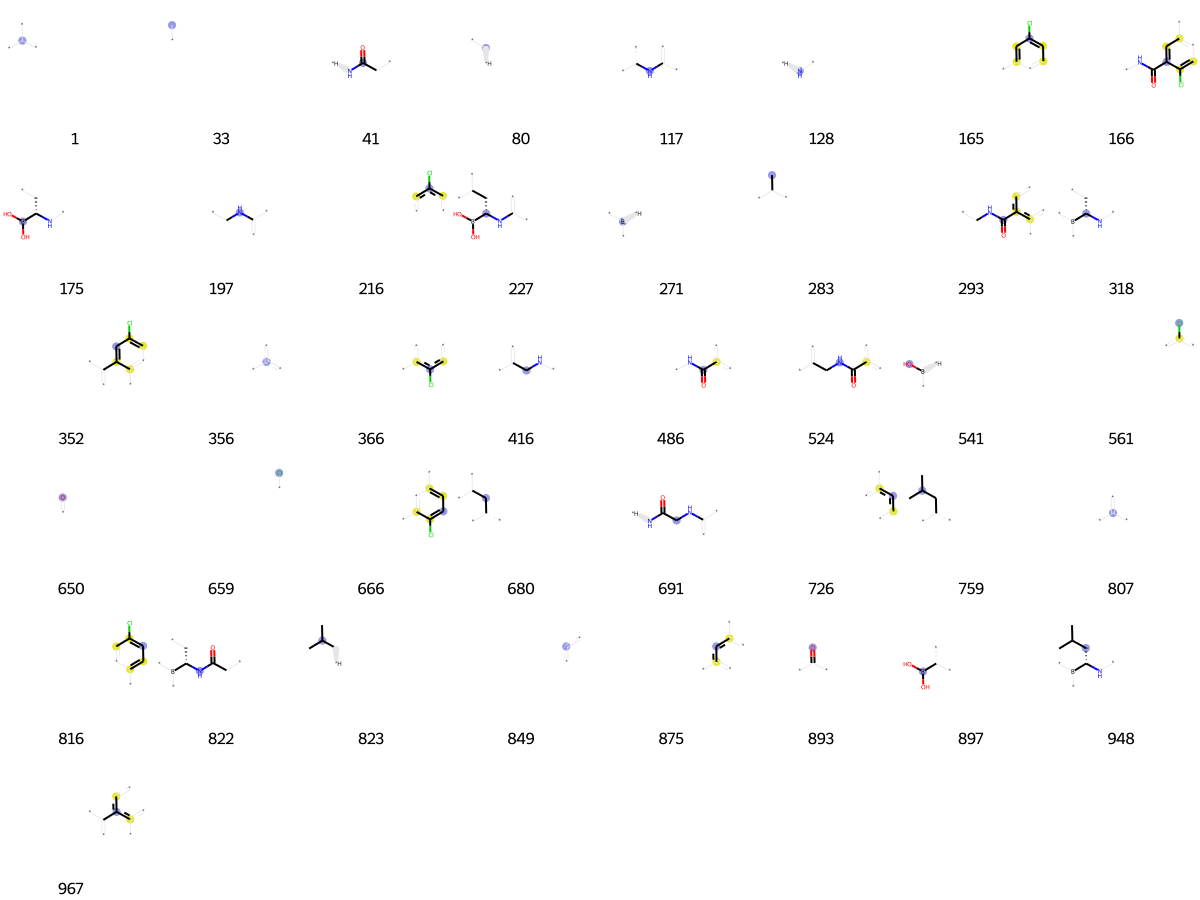

In [5080]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [5081]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[1,
 33,
 37,
 45,
 74,
 75,
 90,
 128,
 194,
 233,
 268,
 283,
 298,
 311,
 342,
 356,
 366,
 378,
 386,
 428,
 491,
 501,
 511,
 541,
 544,
 555,
 558,
 561,
 601,
 603,
 618,
 646,
 659,
 664,
 688,
 690,
 695,
 699,
 708,
 721,
 726,
 734,
 748,
 754,
 831,
 849,
 875,
 883,
 904,
 954,
 969,
 980,
 999]

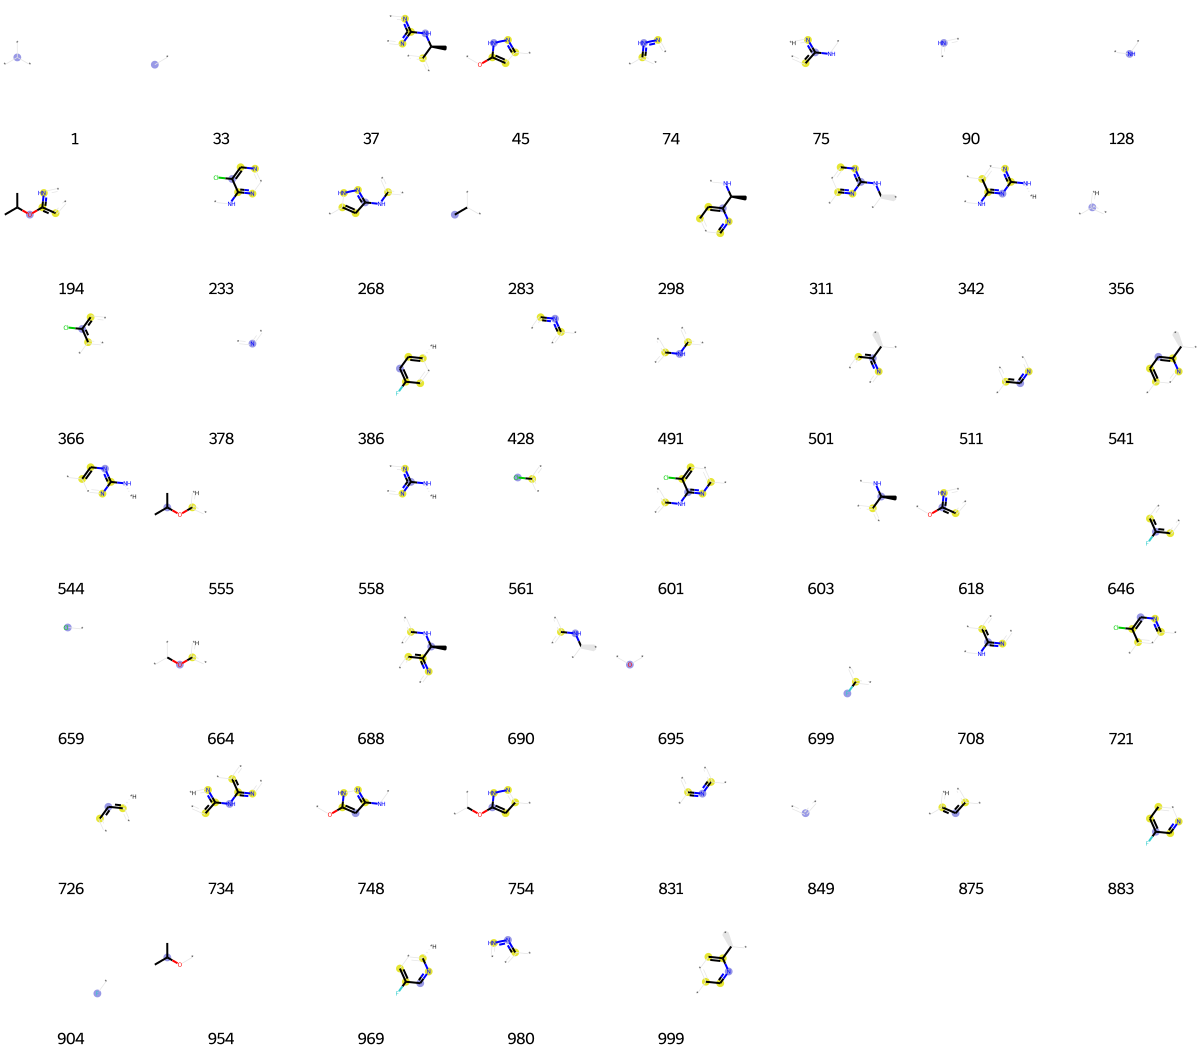

In [5082]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [5083]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[4,
 33,
 40,
 64,
 80,
 126,
 128,
 131,
 136,
 142,
 145,
 147,
 175,
 191,
 192,
 202,
 214,
 246,
 257,
 294,
 319,
 331,
 350,
 356,
 378,
 389,
 415,
 428,
 452,
 464,
 477,
 488,
 502,
 511,
 546,
 575,
 579,
 588,
 623,
 650,
 695,
 698,
 706,
 726,
 743,
 759,
 807,
 819,
 849,
 875,
 883,
 893,
 896,
 935,
 945,
 1000]

In [5084]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[14,
 15,
 33,
 61,
 64,
 80,
 105,
 117,
 121,
 128,
 207,
 212,
 246,
 252,
 254,
 319,
 325,
 337,
 350,
 356,
 364,
 366,
 378,
 385,
 392,
 452,
 456,
 480,
 502,
 503,
 543,
 552,
 561,
 565,
 650,
 658,
 659,
 675,
 698,
 724,
 726,
 734,
 760,
 798,
 807,
 831,
 849,
 893,
 926,
 935,
 974,
 985,
 992,
 1009]

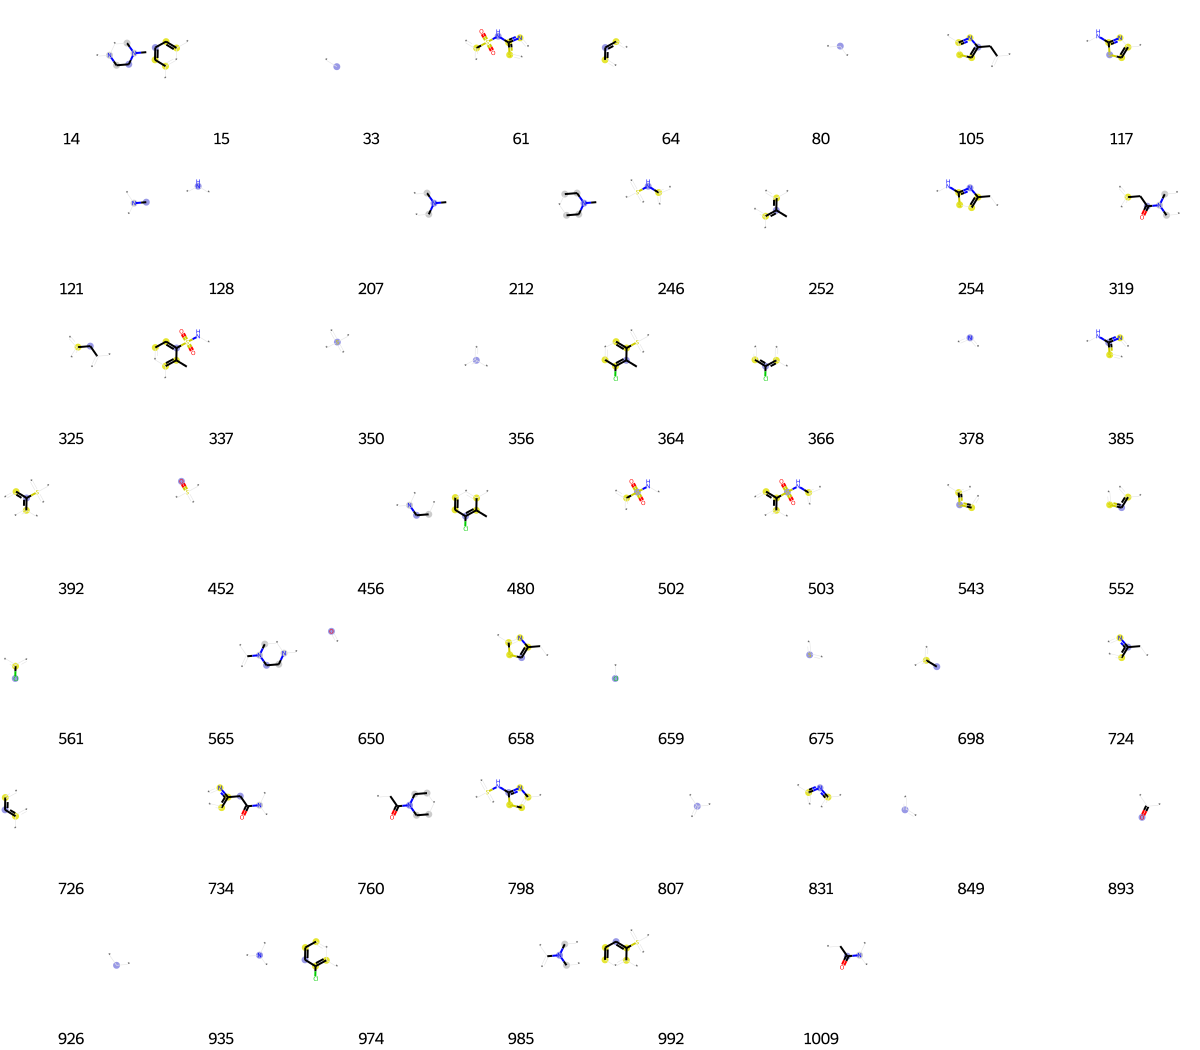

In [5085]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [5086]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[2,
 4,
 33,
 36,
 62,
 75,
 90,
 94,
 128,
 138,
 147,
 148,
 200,
 203,
 204,
 209,
 218,
 256,
 289,
 314,
 325,
 356,
 367,
 377,
 378,
 428,
 433,
 489,
 491,
 504,
 614,
 633,
 645,
 650,
 676,
 677,
 698,
 736,
 786,
 831,
 836,
 849,
 875,
 884,
 889,
 920,
 926,
 935]

In [5087]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[4,
 24,
 33,
 39,
 68,
 77,
 80,
 93,
 97,
 102,
 112,
 114,
 123,
 128,
 157,
 160,
 182,
 197,
 240,
 255,
 262,
 268,
 301,
 305,
 325,
 356,
 360,
 378,
 406,
 419,
 428,
 429,
 451,
 458,
 474,
 541,
 558,
 565,
 610,
 650,
 674,
 689,
 698,
 717,
 726,
 790,
 807,
 809,
 831,
 849,
 875,
 893,
 904,
 926,
 930,
 951,
 974,
 982,
 1019]

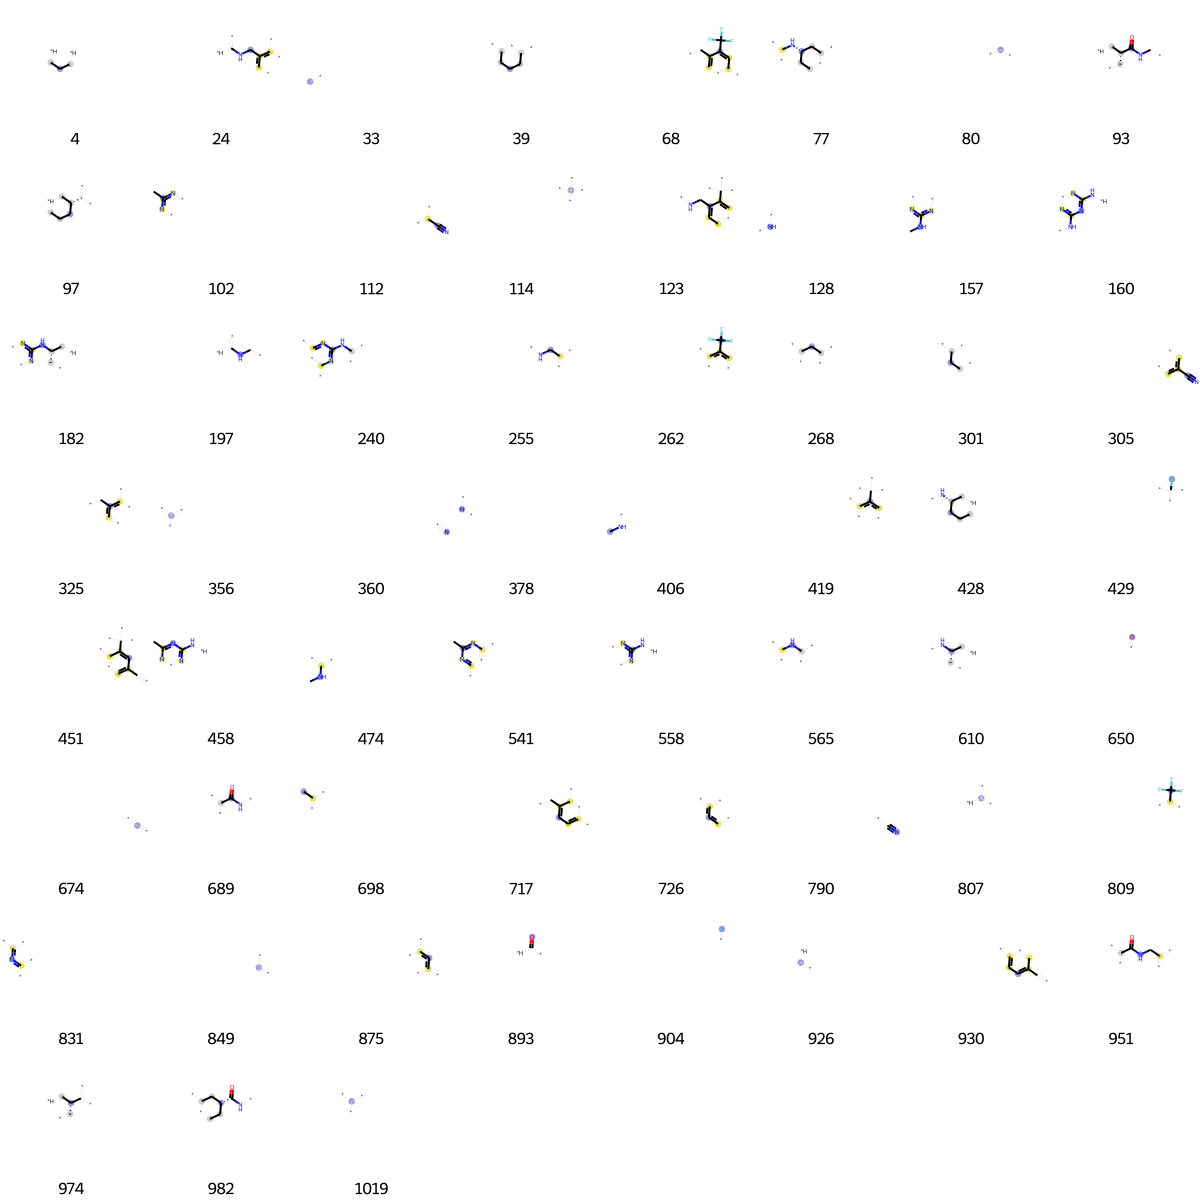

In [5088]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [5089]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[36,
 64,
 87,
 128,
 138,
 175,
 179,
 240,
 326,
 353,
 356,
 361,
 378,
 389,
 411,
 428,
 486,
 511,
 544,
 556,
 558,
 607,
 650,
 653,
 726,
 744,
 772,
 807,
 820,
 849,
 878,
 893,
 898,
 926,
 944]

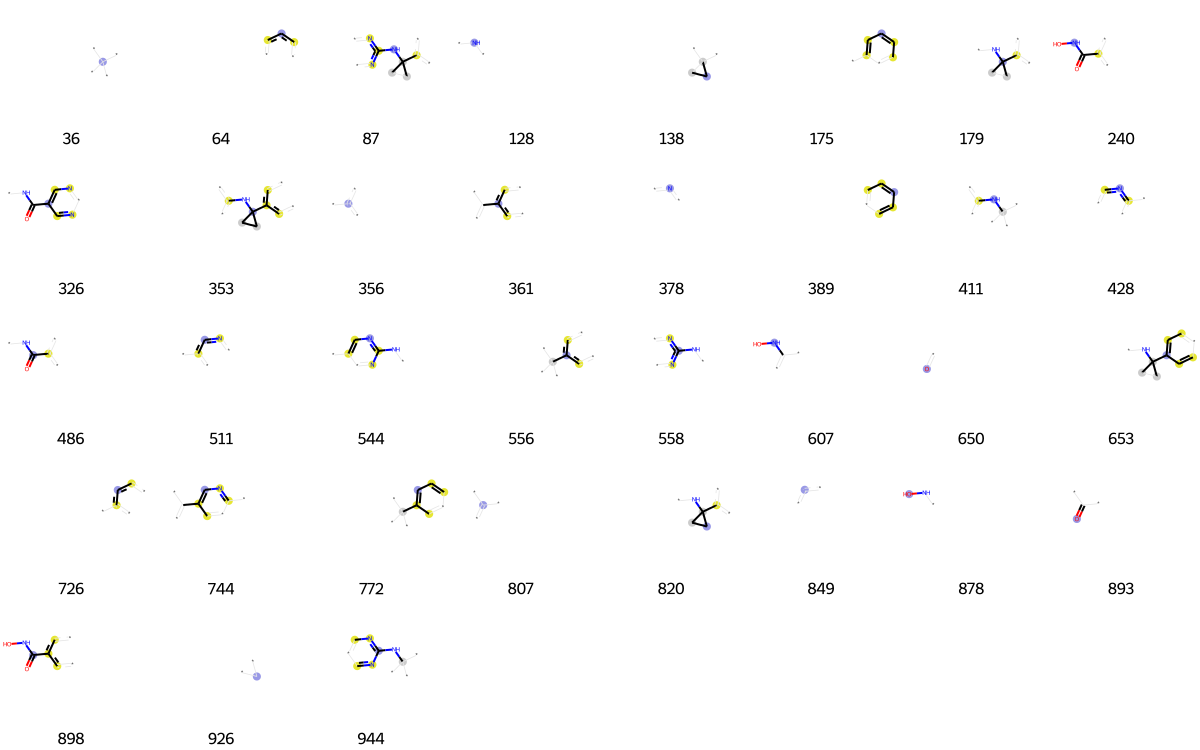

In [5090]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [5091]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[13,
 33,
 39,
 64,
 69,
 80,
 102,
 116,
 193,
 214,
 233,
 237,
 255,
 294,
 295,
 310,
 322,
 325,
 356,
 366,
 368,
 394,
 403,
 406,
 428,
 463,
 561,
 573,
 656,
 659,
 666,
 670,
 695,
 700,
 718,
 726,
 730,
 771,
 779,
 796,
 807,
 849,
 858,
 875,
 897,
 914,
 975,
 1019]

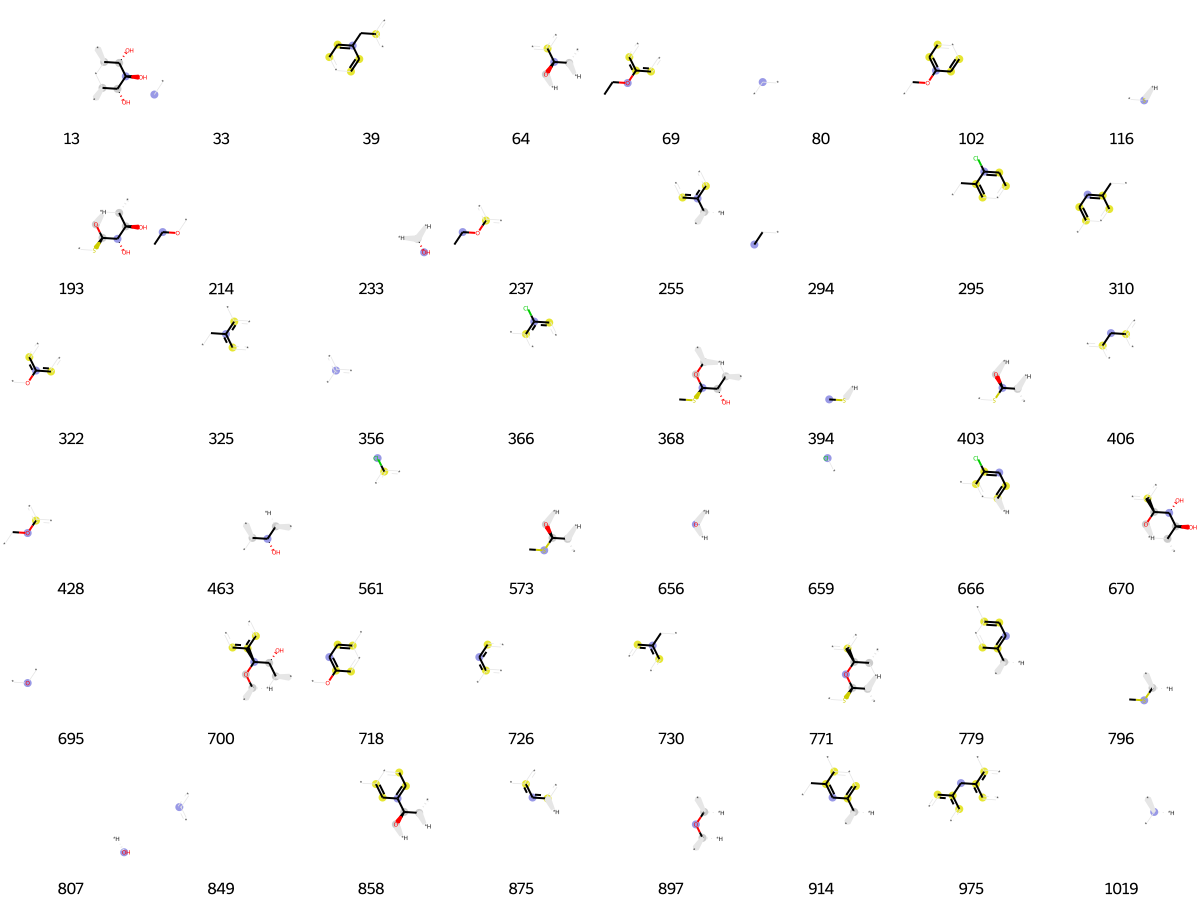

In [5092]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [5093]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[1,
 13,
 33,
 78,
 80,
 117,
 128,
 156,
 248,
 263,
 294,
 347,
 355,
 356,
 361,
 366,
 378,
 389,
 404,
 411,
 420,
 460,
 486,
 526,
 530,
 540,
 559,
 561,
 591,
 645,
 650,
 659,
 666,
 673,
 695,
 713,
 726,
 736,
 739,
 767,
 794,
 807,
 841,
 849,
 875,
 881,
 887,
 893,
 927,
 935,
 955,
 978,
 1005]

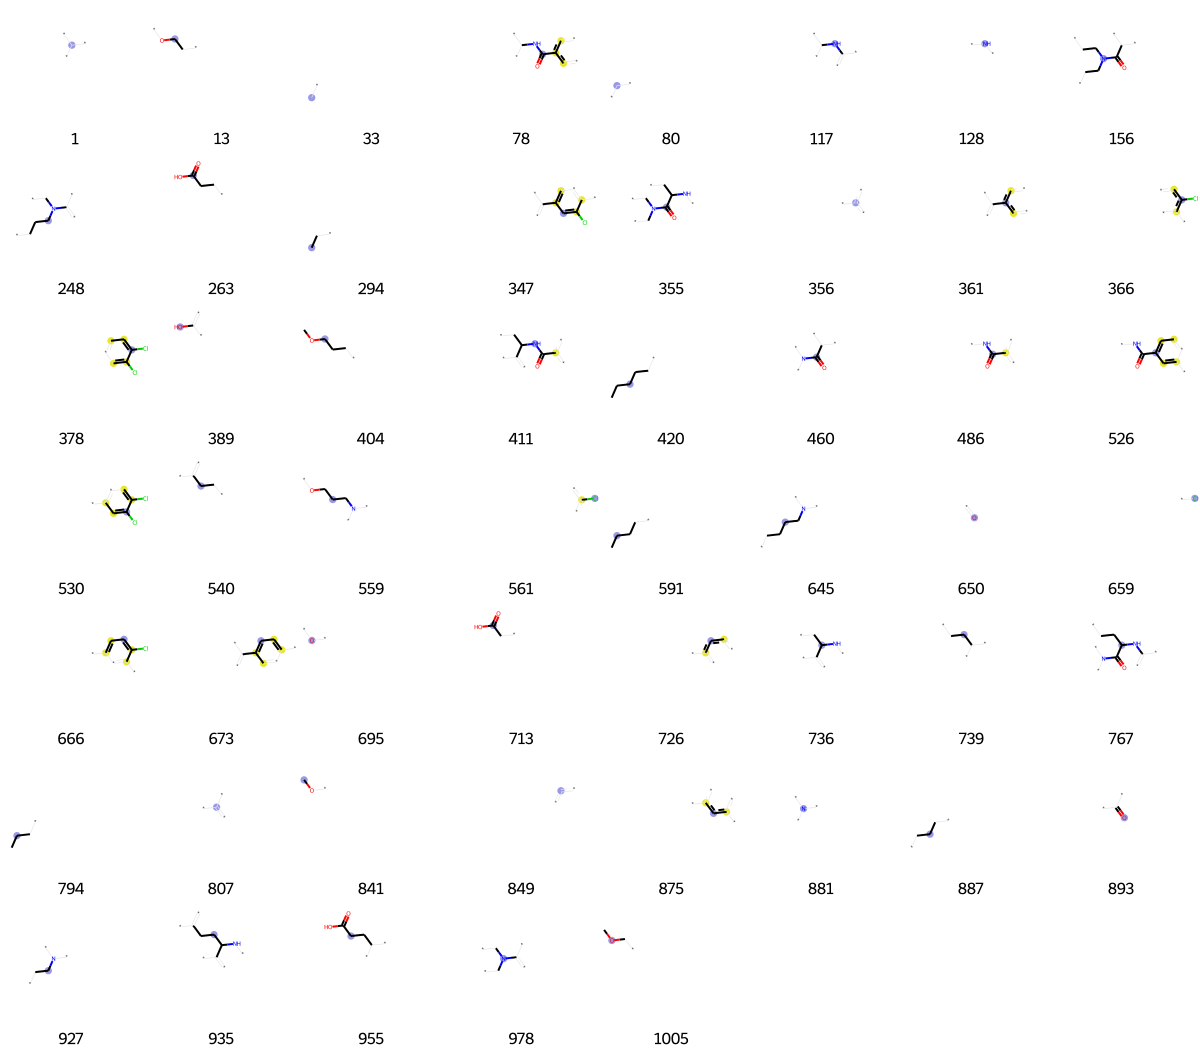

In [5094]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [5095]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[1,
 33,
 46,
 64,
 75,
 80,
 90,
 131,
 139,
 175,
 186,
 216,
 341,
 356,
 378,
 389,
 428,
 448,
 501,
 529,
 561,
 567,
 652,
 659,
 693,
 726,
 738,
 739,
 816,
 829,
 842,
 845,
 849,
 881,
 927]

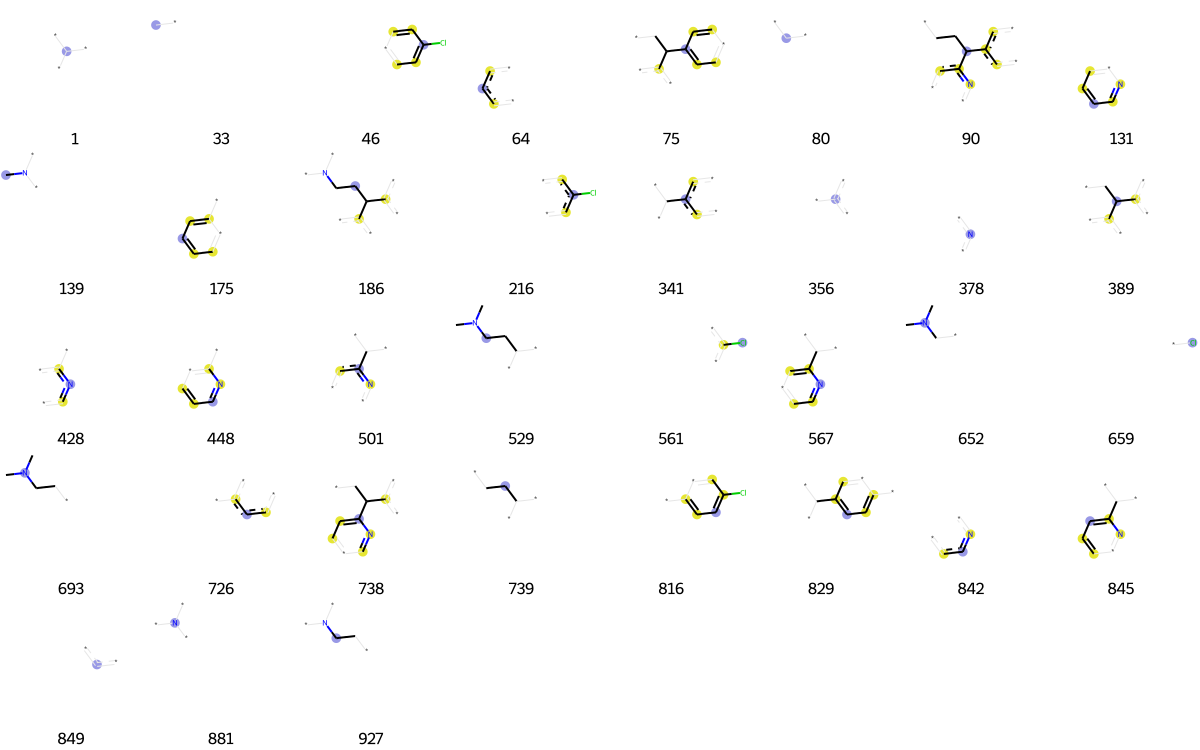

In [5096]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [5097]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[29,
 33,
 64,
 80,
 112,
 235,
 242,
 245,
 285,
 301,
 311,
 352,
 356,
 361,
 378,
 386,
 425,
 428,
 448,
 461,
 480,
 494,
 511,
 530,
 546,
 587,
 596,
 646,
 647,
 650,
 680,
 695,
 698,
 699,
 714,
 726,
 734,
 739,
 799,
 807,
 841,
 842,
 849,
 860,
 875,
 878,
 883,
 884,
 892,
 893,
 904,
 914,
 926,
 935,
 967,
 969,
 1005,
 1013,
 1019]

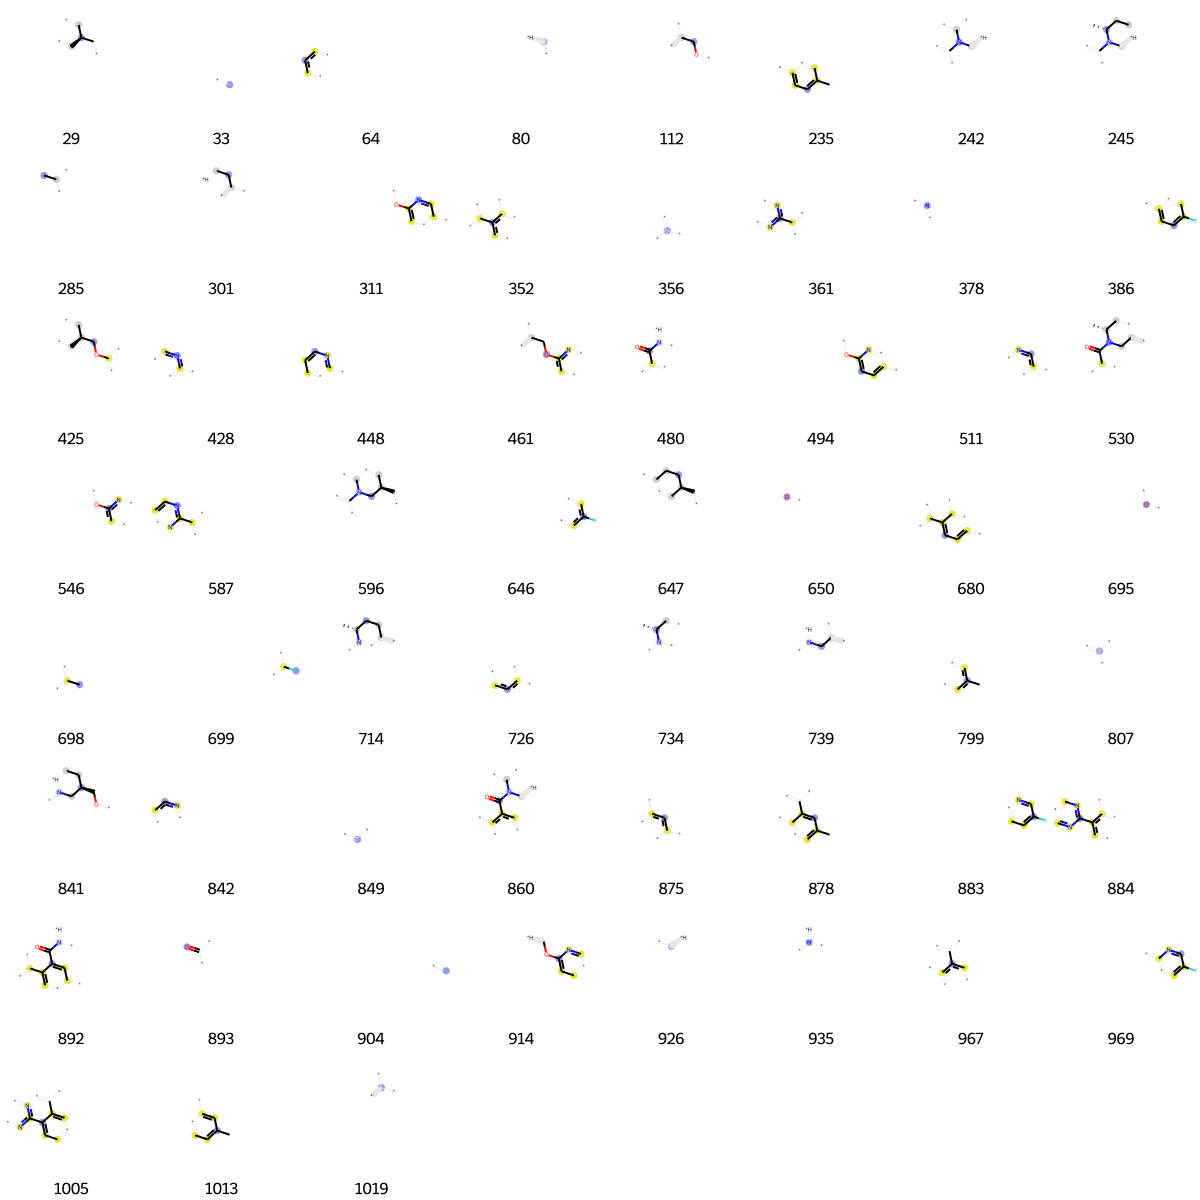

In [5098]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [5099]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[1,
 3,
 33,
 64,
 112,
 114,
 117,
 128,
 139,
 171,
 172,
 175,
 283,
 356,
 365,
 379,
 389,
 392,
 393,
 406,
 442,
 446,
 460,
 480,
 483,
 488,
 512,
 573,
 625,
 650,
 658,
 659,
 694,
 726,
 728,
 745,
 749,
 790,
 807,
 809,
 833,
 847,
 849,
 881,
 883,
 893,
 906,
 993,
 1017]

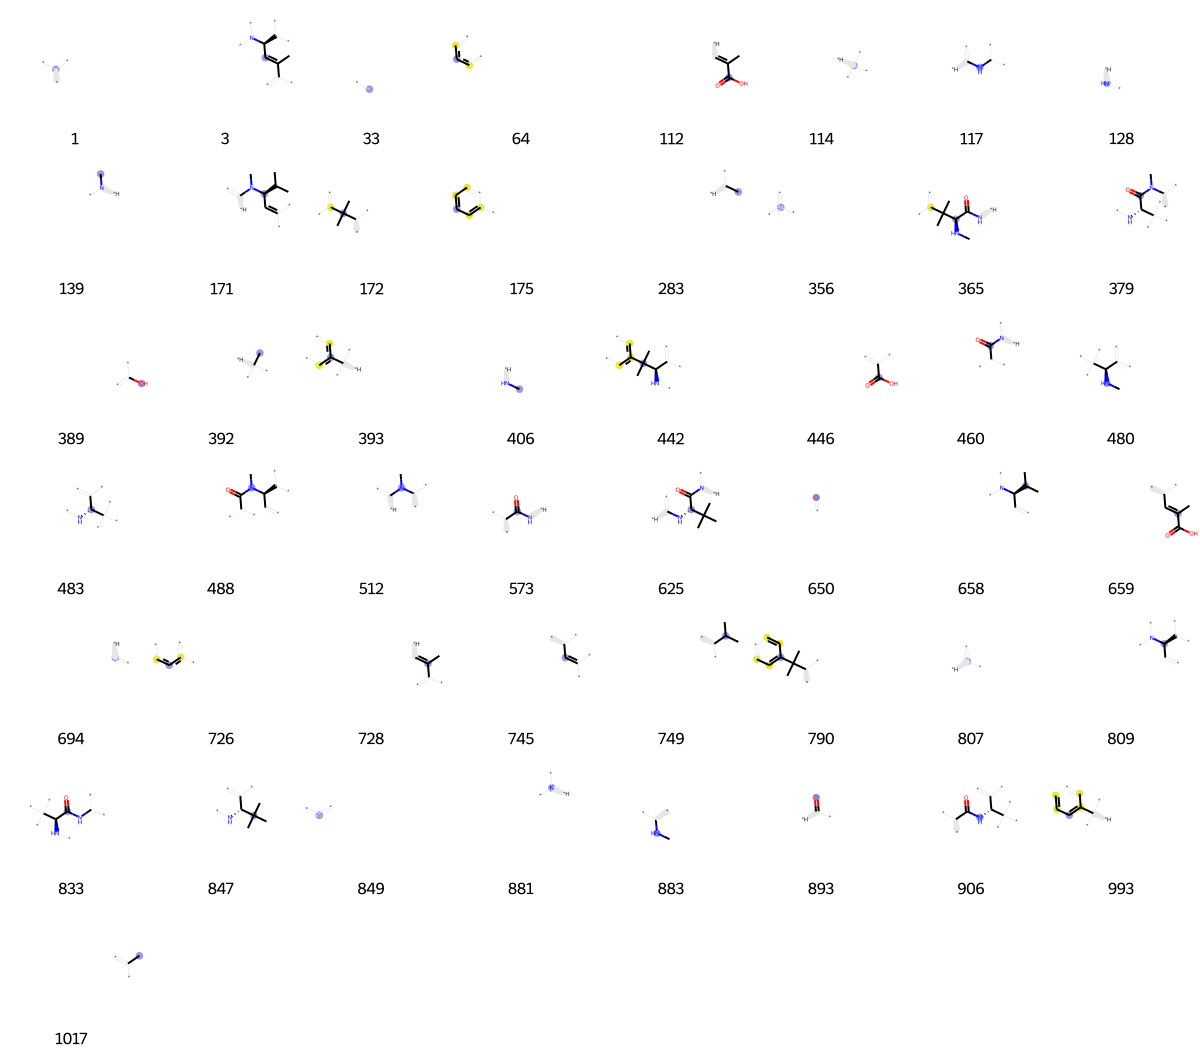

In [5100]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [5101]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[29,
 33,
 41,
 46,
 80,
 123,
 127,
 147,
 162,
 164,
 171,
 201,
 211,
 214,
 216,
 251,
 268,
 287,
 294,
 295,
 301,
 310,
 342,
 356,
 456,
 492,
 504,
 507,
 561,
 564,
 606,
 650,
 652,
 656,
 659,
 675,
 695,
 698,
 715,
 726,
 730,
 739,
 753,
 800,
 807,
 816,
 834,
 838,
 849,
 876,
 881,
 893,
 926,
 935,
 939,
 957,
 985,
 1019]

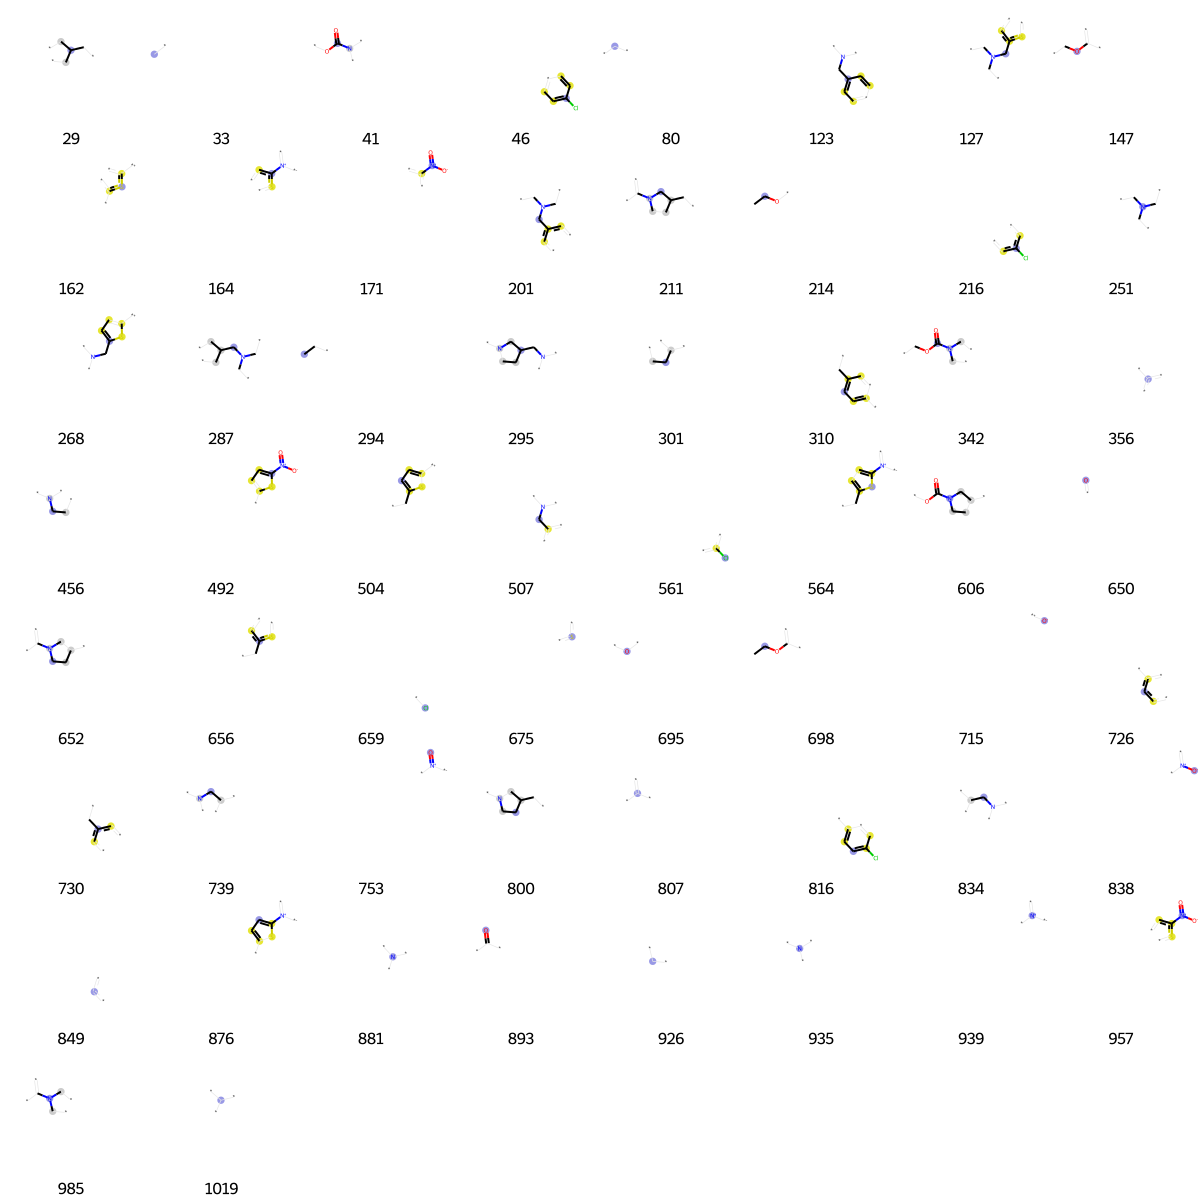

In [5102]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [5103]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[1,
 15,
 17,
 36,
 42,
 64,
 80,
 114,
 128,
 130,
 132,
 136,
 138,
 144,
 192,
 197,
 236,
 260,
 265,
 272,
 301,
 319,
 356,
 361,
 378,
 393,
 416,
 428,
 429,
 448,
 456,
 463,
 486,
 498,
 511,
 524,
 526,
 574,
 587,
 595,
 610,
 650,
 652,
 678,
 712,
 726,
 739,
 763,
 778,
 807,
 809,
 814,
 833,
 842,
 849,
 860,
 875,
 893,
 896,
 904,
 914,
 926,
 935,
 961,
 985,
 993,
 1009,
 1019,
 1022]

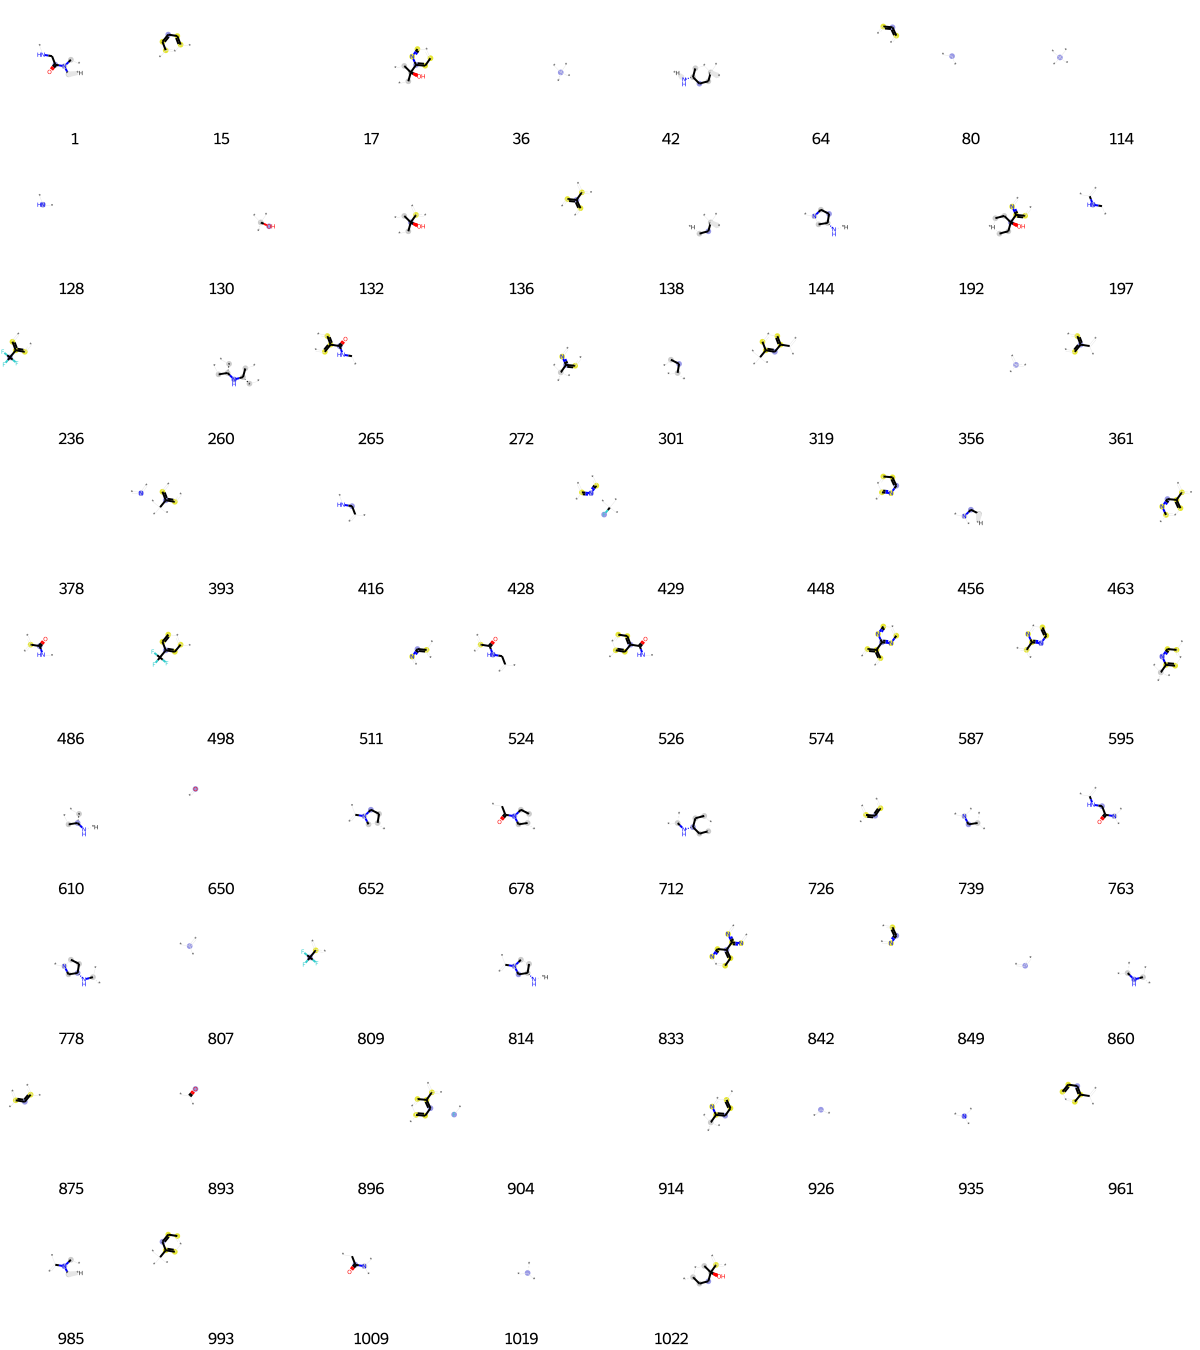

In [5104]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [5105]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[2,
 4,
 15,
 33,
 64,
 74,
 80,
 97,
 121,
 131,
 175,
 185,
 231,
 249,
 253,
 271,
 301,
 324,
 338,
 356,
 378,
 386,
 407,
 428,
 448,
 456,
 458,
 484,
 495,
 510,
 512,
 561,
 623,
 650,
 695,
 726,
 767,
 780,
 783,
 807,
 841,
 842,
 849,
 874,
 881,
 890,
 893,
 894,
 915,
 926,
 927,
 935,
 946,
 974,
 1019]

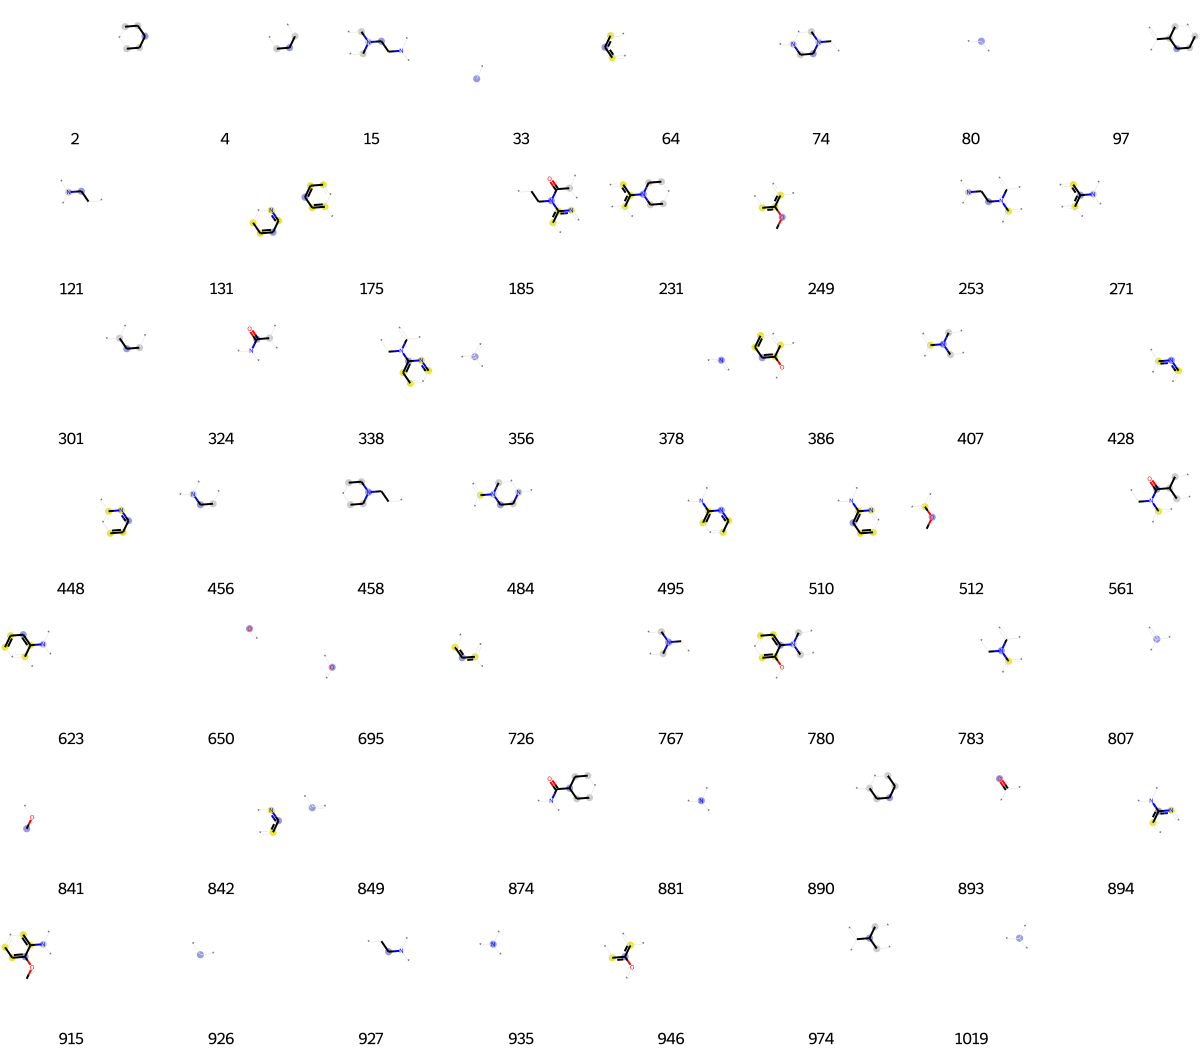

In [5106]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [5107]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[33,
 42,
 64,
 80,
 123,
 139,
 175,
 212,
 293,
 356,
 389,
 507,
 550,
 617,
 646,
 674,
 726,
 730,
 773,
 849,
 881,
 915,
 971,
 974]

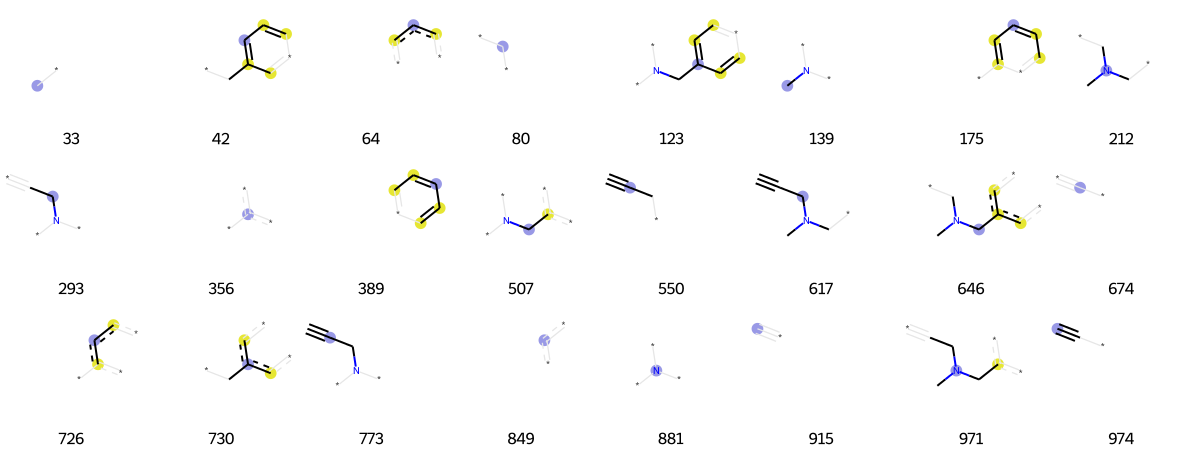

In [5108]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [5109]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[0,
 3,
 33,
 36,
 64,
 82,
 90,
 128,
 143,
 145,
 147,
 164,
 171,
 175,
 354,
 356,
 371,
 387,
 440,
 484,
 627,
 650,
 695,
 698,
 715,
 716,
 726,
 753,
 807,
 838,
 841,
 849,
 893,
 906,
 939,
 1005,
 1019]

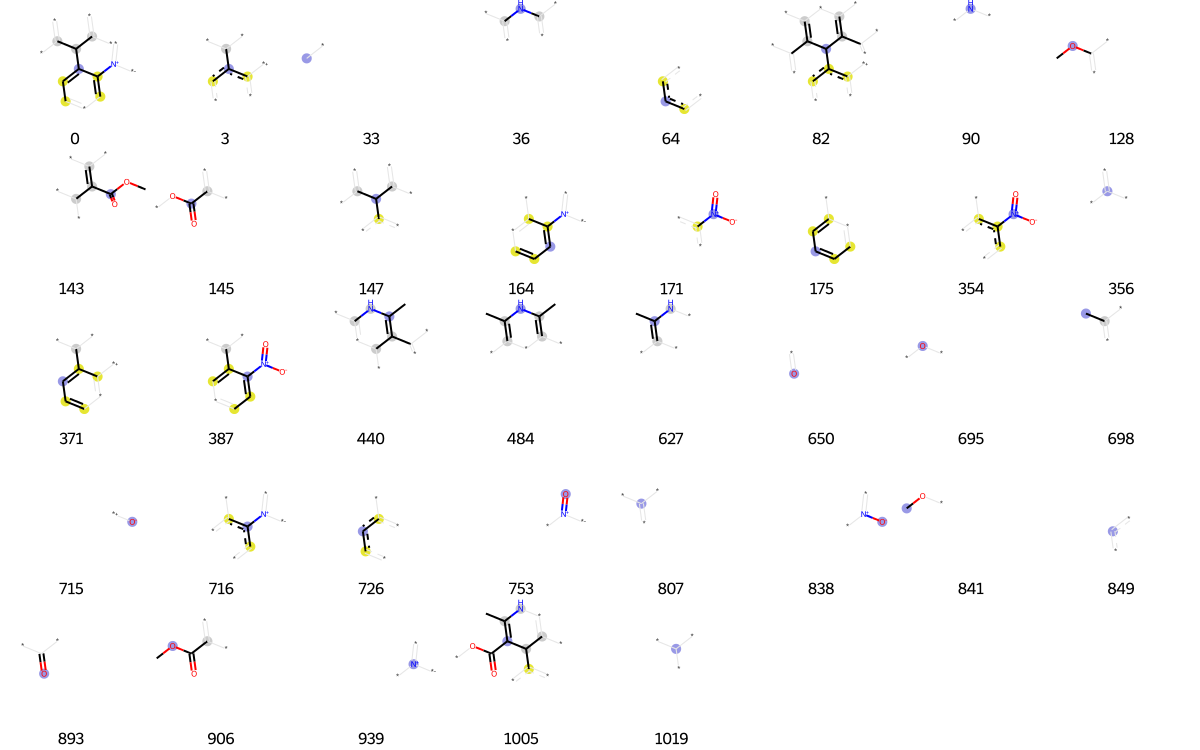

In [5110]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [5111]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[1,
 15,
 17,
 33,
 37,
 64,
 102,
 112,
 128,
 130,
 136,
 148,
 232,
 285,
 333,
 345,
 356,
 358,
 361,
 378,
 406,
 417,
 422,
 444,
 456,
 485,
 486,
 523,
 526,
 557,
 600,
 604,
 650,
 656,
 684,
 709,
 726,
 734,
 736,
 806,
 807,
 831,
 838,
 849,
 875,
 893,
 899,
 926,
 930,
 935,
 950,
 961,
 980,
 990,
 1012,
 1019]

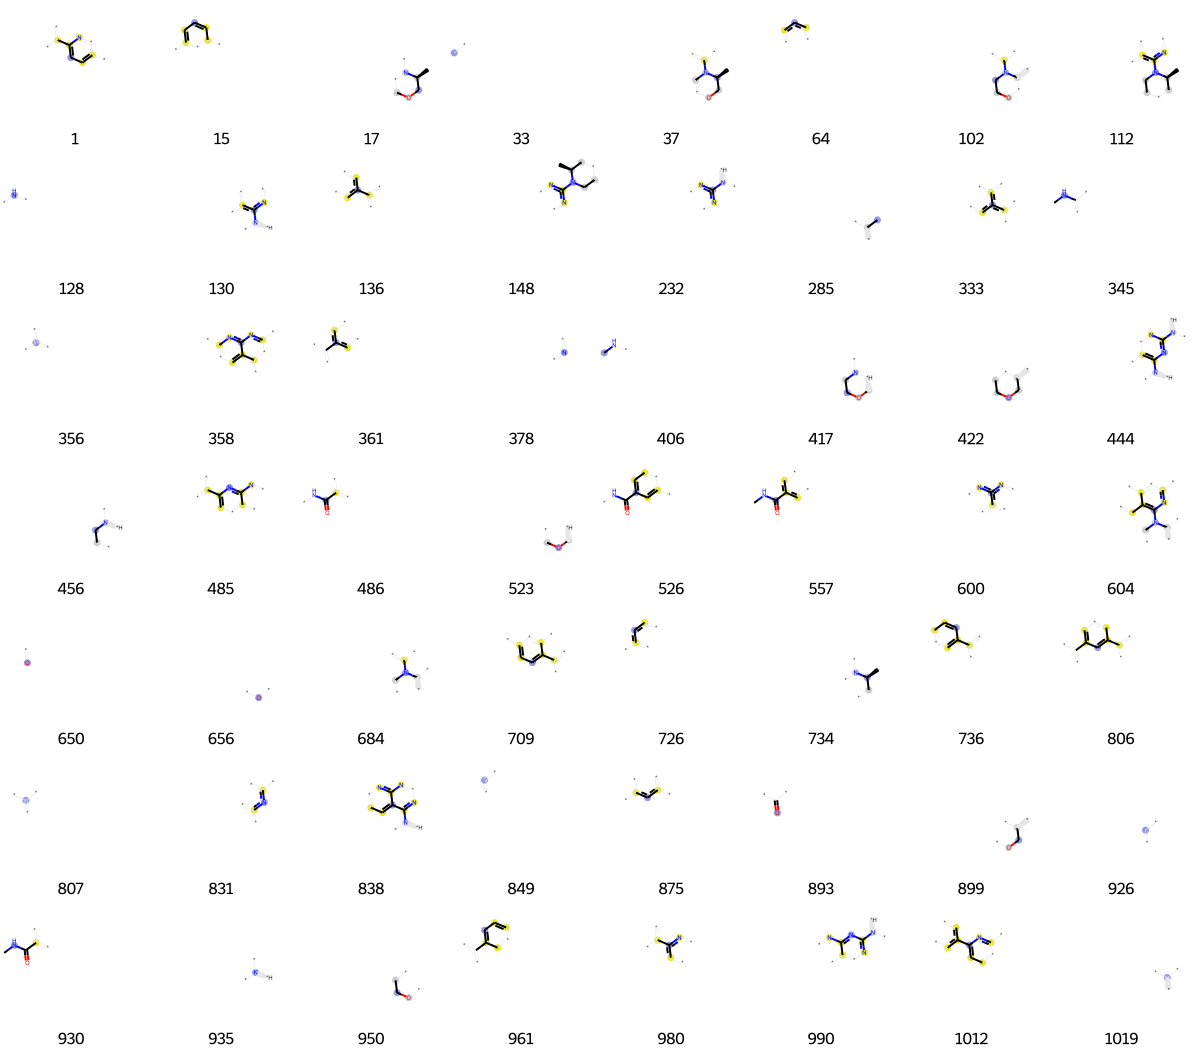

In [5112]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [5113]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[1,
 2,
 29,
 36,
 46,
 80,
 87,
 90,
 117,
 123,
 128,
 130,
 138,
 147,
 149,
 216,
 222,
 290,
 291,
 310,
 314,
 333,
 338,
 341,
 356,
 378,
 407,
 428,
 441,
 448,
 456,
 473,
 479,
 482,
 489,
 507,
 559,
 561,
 567,
 578,
 582,
 650,
 659,
 711,
 726,
 739,
 786,
 806,
 807,
 816,
 829,
 849,
 893,
 926,
 935,
 1009]

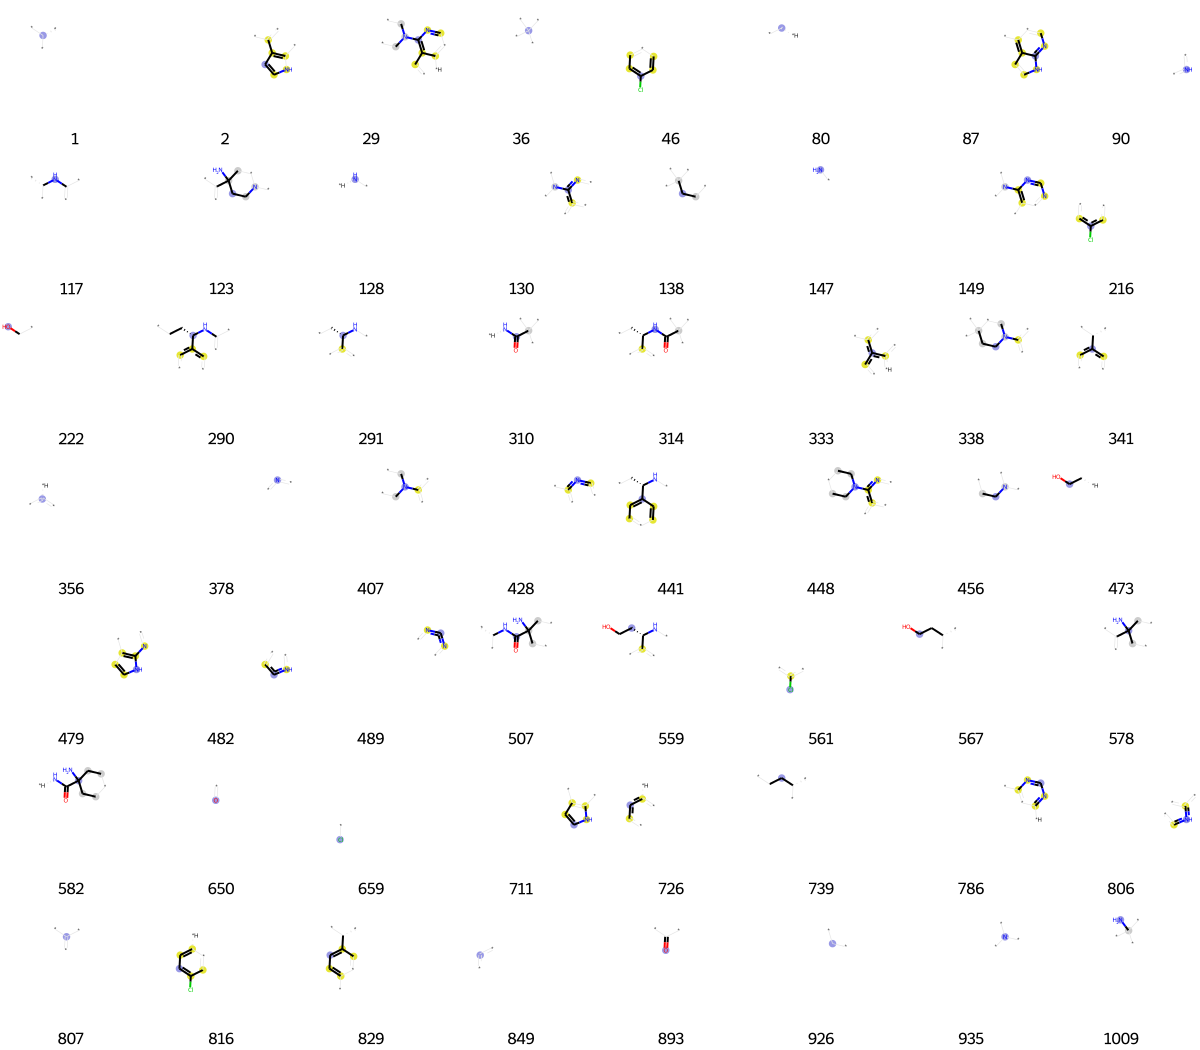

In [5114]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [5115]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[26,
 33,
 39,
 73,
 119,
 128,
 133,
 200,
 202,
 218,
 221,
 233,
 245,
 249,
 301,
 333,
 342,
 343,
 356,
 366,
 378,
 421,
 428,
 456,
 489,
 491,
 512,
 524,
 544,
 561,
 565,
 621,
 624,
 637,
 650,
 652,
 659,
 666,
 673,
 688,
 694,
 695,
 699,
 708,
 726,
 780,
 786,
 794,
 807,
 832,
 841,
 849,
 875,
 881,
 888,
 893,
 904,
 926,
 935,
 946,
 954,
 959,
 985,
 1011,
 1019]

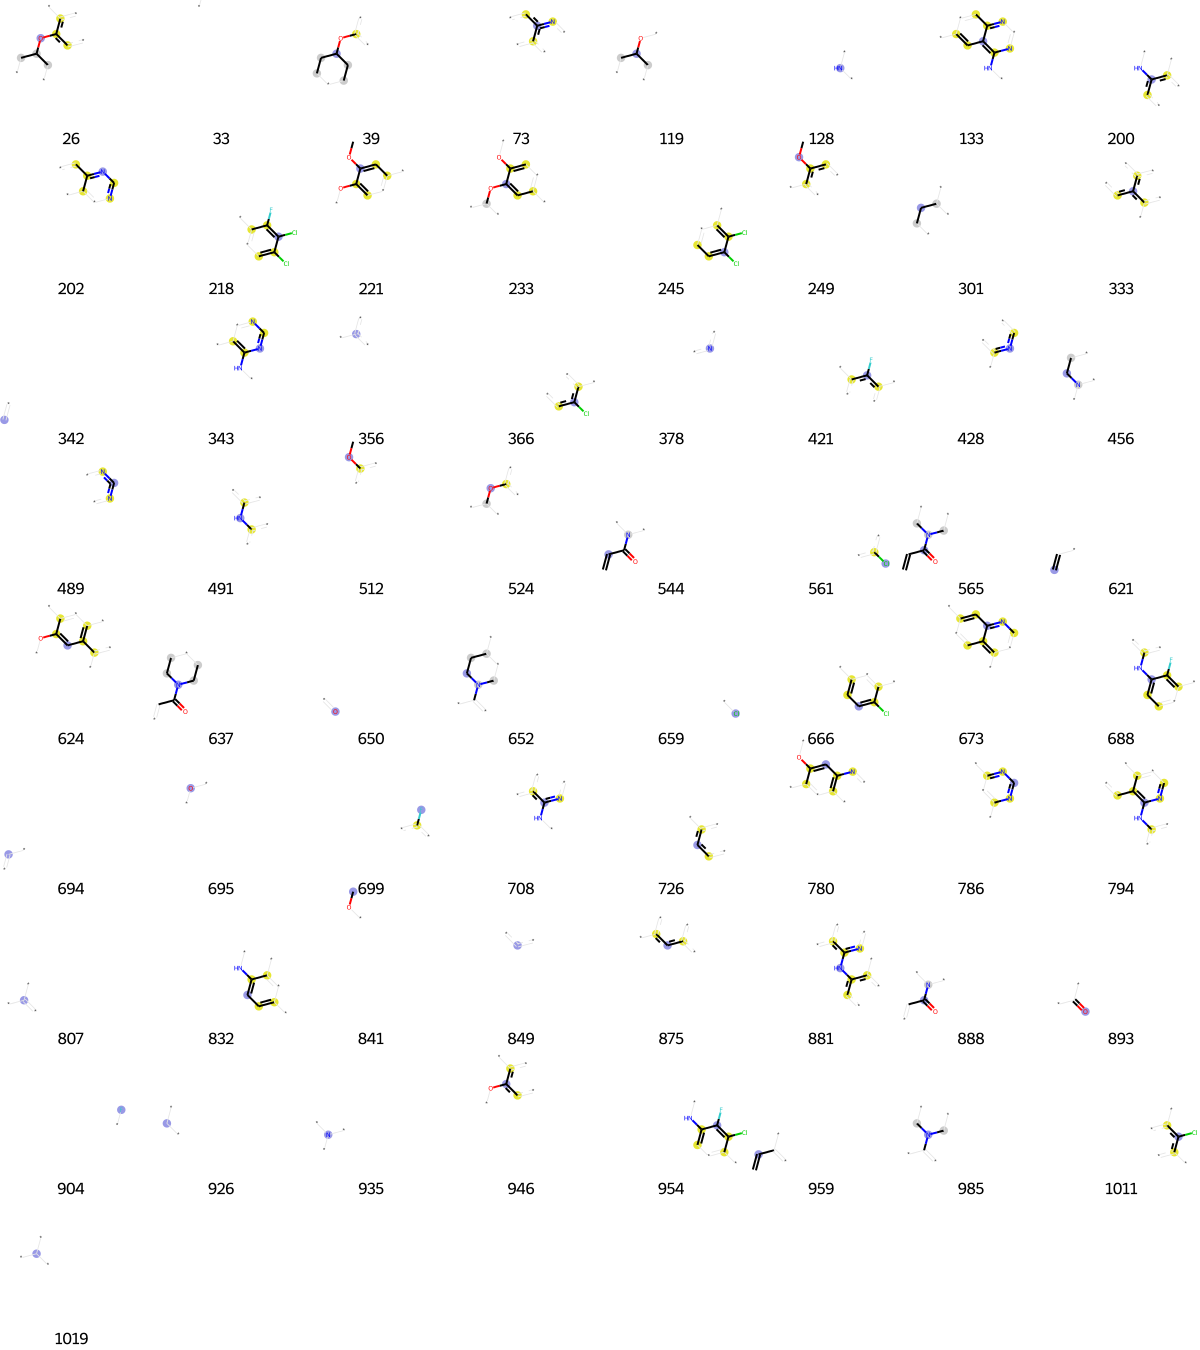

In [5116]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [5117]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[2,
 4,
 13,
 23,
 36,
 64,
 79,
 80,
 121,
 138,
 147,
 175,
 292,
 356,
 381,
 389,
 407,
 417,
 436,
 444,
 456,
 458,
 523,
 533,
 556,
 614,
 650,
 656,
 695,
 726,
 767,
 772,
 807,
 825,
 833,
 849,
 893,
 926,
 935,
 950,
 956]

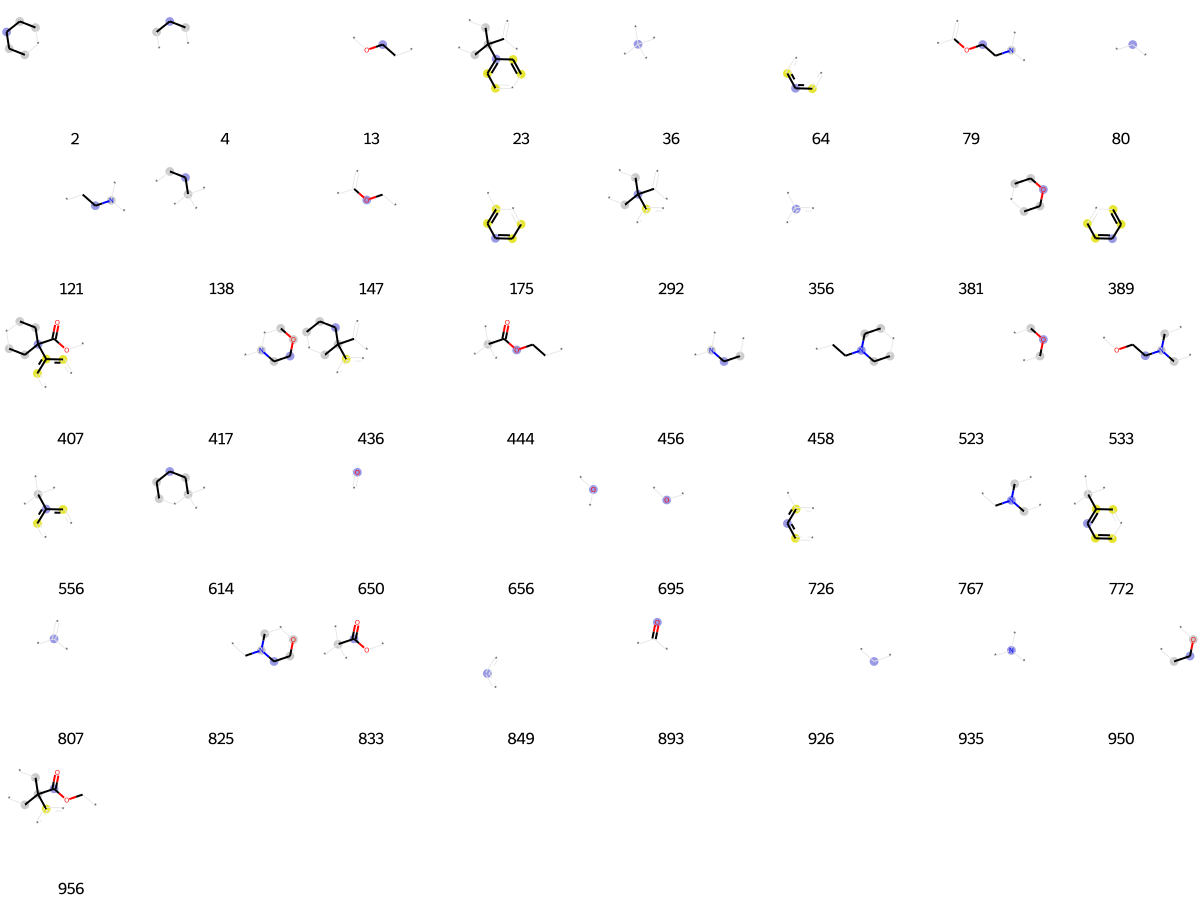

In [5118]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [5119]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[1,
 10,
 15,
 22,
 26,
 33,
 62,
 64,
 128,
 146,
 162,
 165,
 248,
 259,
 283,
 325,
 356,
 366,
 378,
 381,
 385,
 428,
 501,
 511,
 561,
 570,
 573,
 609,
 650,
 659,
 668,
 675,
 726,
 756,
 758,
 792,
 807,
 813,
 822,
 828,
 847,
 849,
 875,
 893,
 904,
 932,
 935,
 974,
 991,
 1004,
 1007]

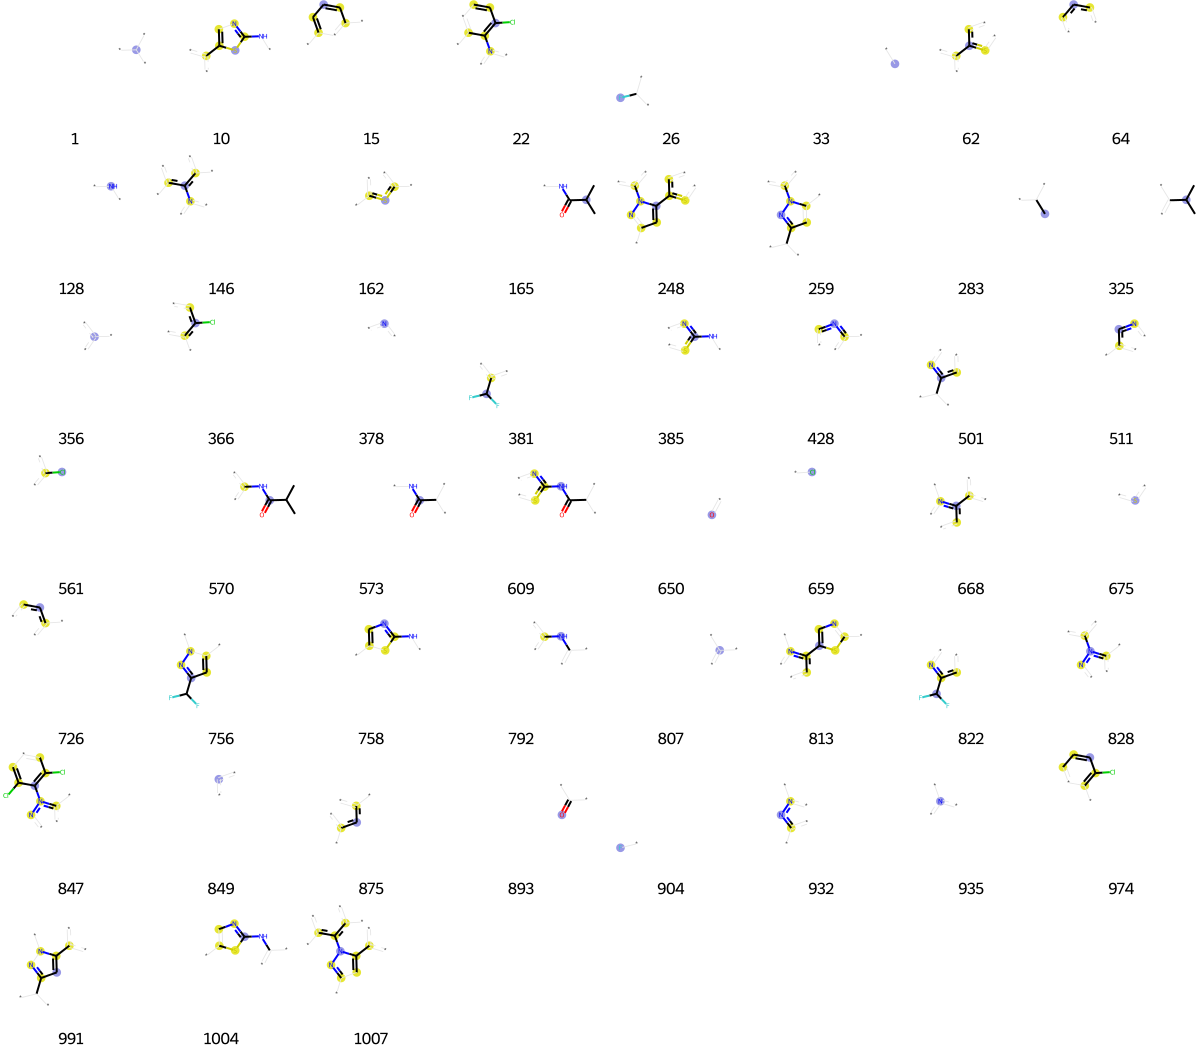

In [5120]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [5121]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[4,
 31,
 33,
 36,
 50,
 53,
 55,
 96,
 128,
 138,
 157,
 173,
 191,
 250,
 259,
 264,
 289,
 295,
 325,
 356,
 420,
 432,
 444,
 488,
 500,
 552,
 578,
 602,
 618,
 642,
 650,
 665,
 694,
 698,
 714,
 718,
 726,
 745,
 754,
 792,
 803,
 807,
 835,
 843,
 849,
 893,
 926,
 932,
 933,
 953,
 1017]

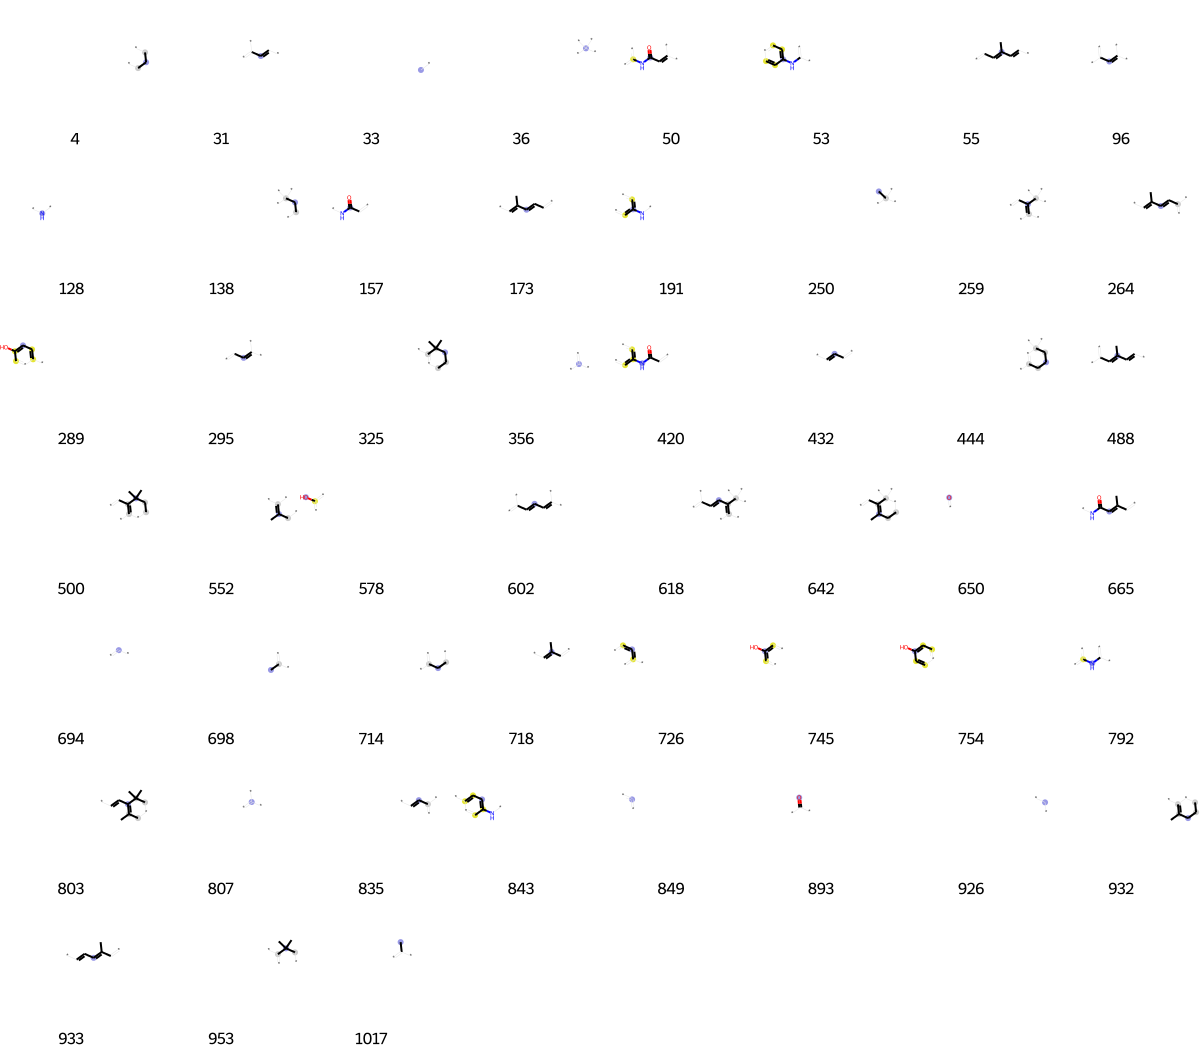

In [5122]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [5123]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[33,
 58,
 75,
 102,
 114,
 125,
 145,
 189,
 233,
 249,
 317,
 322,
 356,
 361,
 378,
 385,
 410,
 428,
 429,
 430,
 548,
 561,
 563,
 612,
 659,
 674,
 695,
 698,
 711,
 718,
 726,
 734,
 742,
 787,
 801,
 804,
 815,
 831,
 838,
 842,
 849,
 875,
 904,
 917,
 935,
 965,
 969,
 1010]

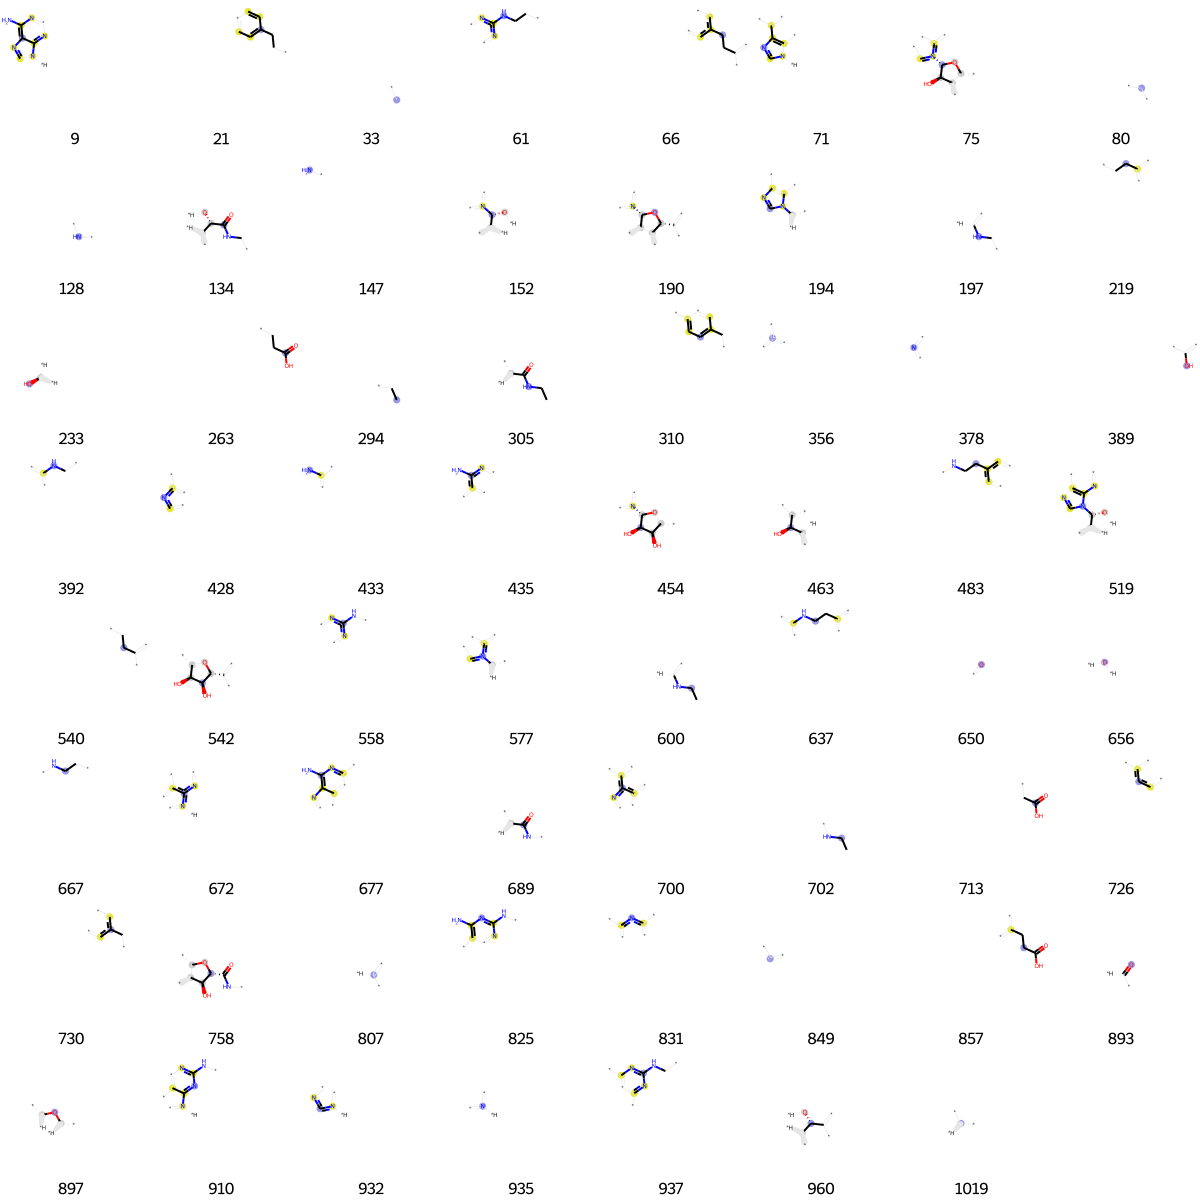

In [5124]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [5125]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[33,
 46,
 64,
 75,
 78,
 121,
 128,
 131,
 134,
 162,
 175,
 207,
 239,
 240,
 288,
 302,
 315,
 356,
 365,
 375,
 378,
 381,
 428,
 448,
 469,
 470,
 486,
 489,
 506,
 511,
 561,
 567,
 578,
 650,
 659,
 675,
 726,
 792,
 807,
 840,
 842,
 849,
 875,
 893,
 924,
 935,
 987,
 990,
 993]

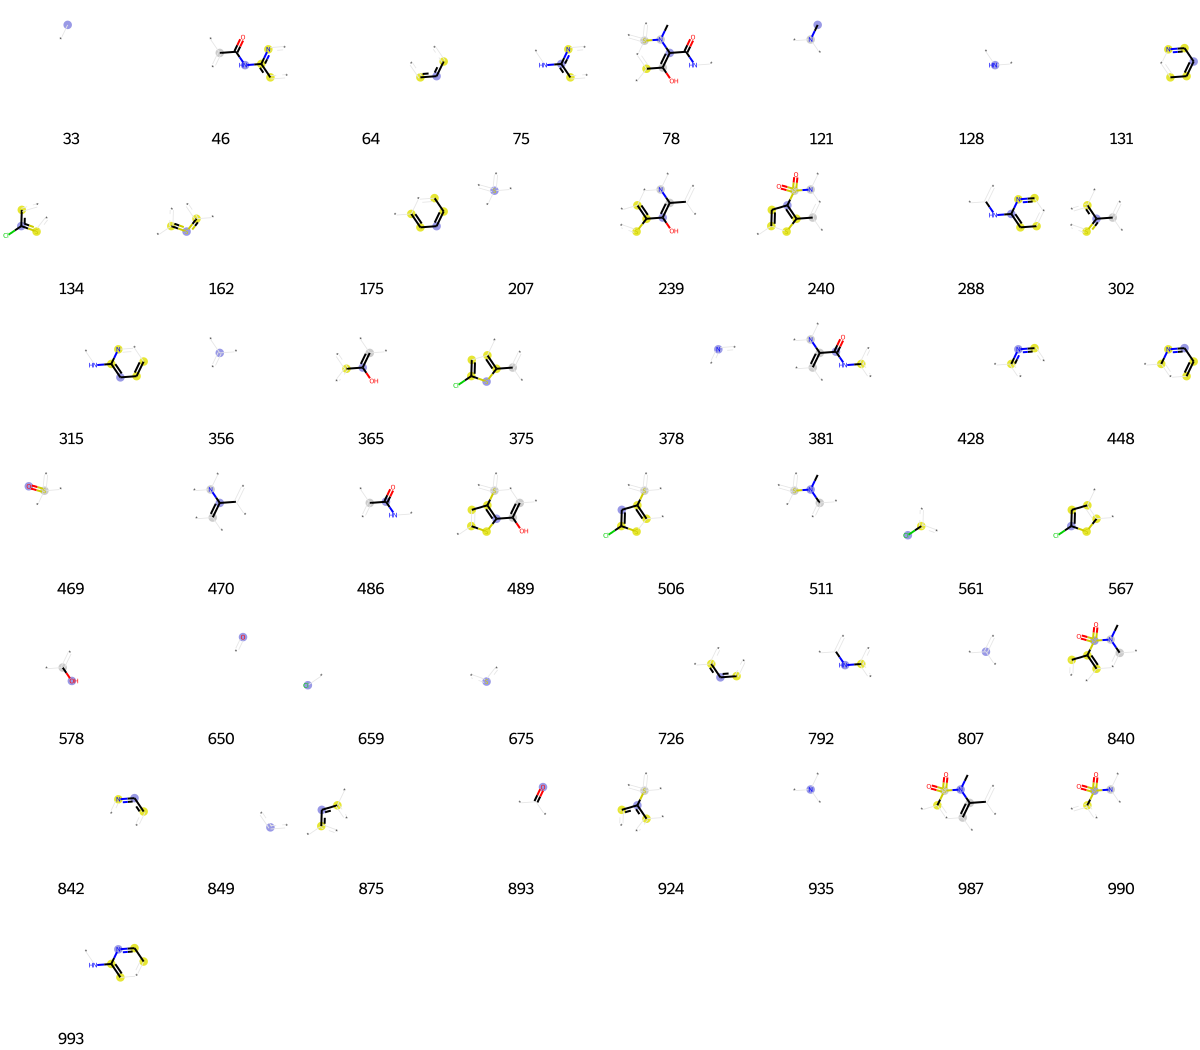

In [5126]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [5127]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[1,
 40,
 64,
 175,
 227,
 341,
 344,
 356,
 367,
 389,
 557,
 650,
 726,
 807,
 820,
 849,
 893,
 963]

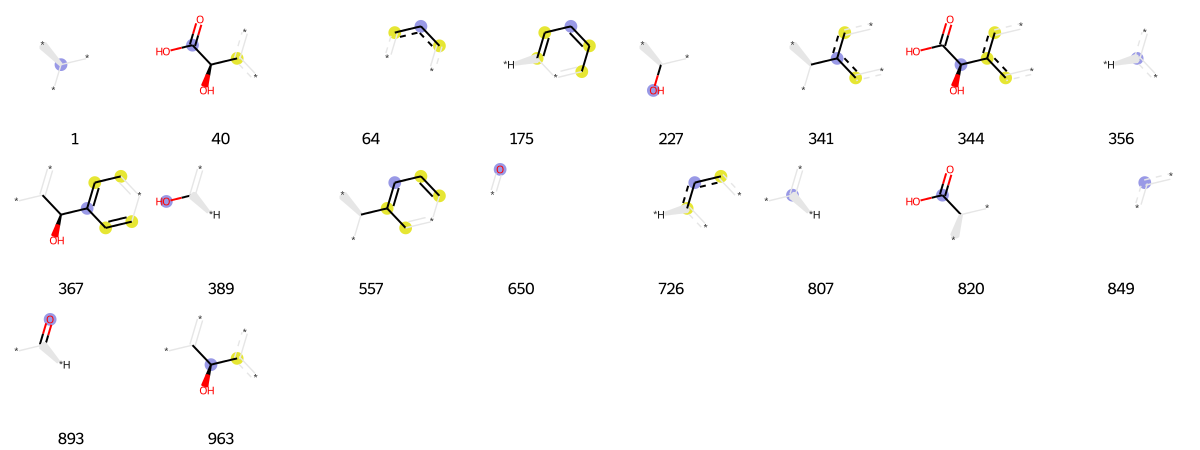

In [5128]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [5129]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[1,
 79,
 80,
 125,
 165,
 193,
 227,
 310,
 315,
 356,
 389,
 451,
 578,
 583,
 589,
 637,
 650,
 687,
 726,
 730,
 807,
 820,
 849,
 875,
 893,
 966]

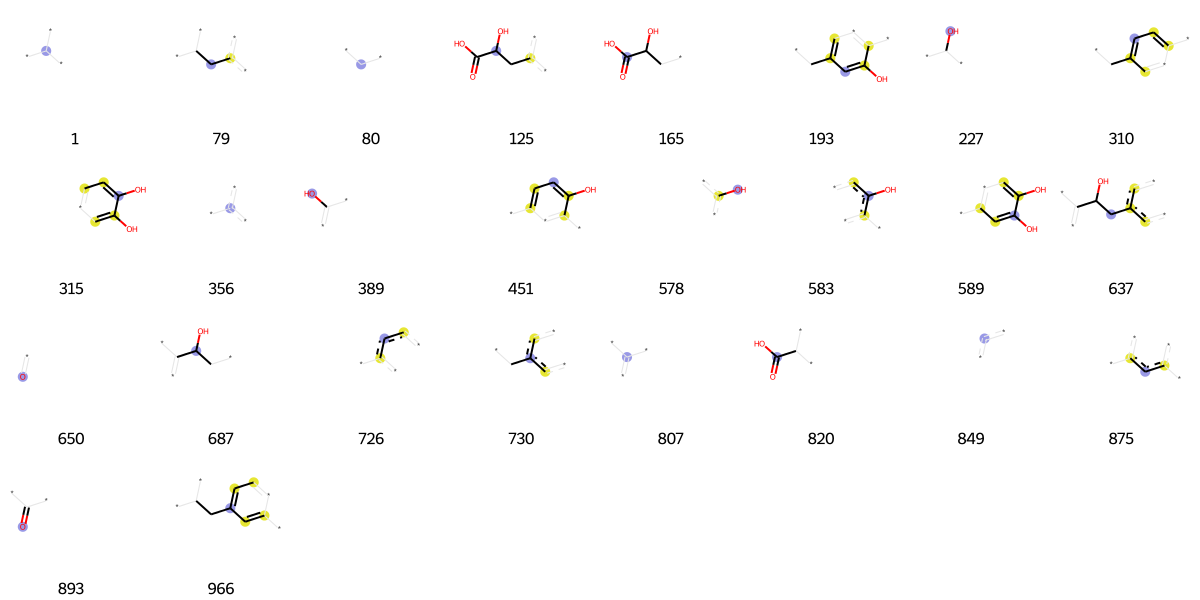

In [5130]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [5131]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[4,
 25,
 31,
 56,
 64,
 73,
 147,
 175,
 233,
 275,
 280,
 289,
 301,
 333,
 337,
 356,
 378,
 389,
 433,
 473,
 508,
 527,
 549,
 624,
 650,
 670,
 694,
 712,
 714,
 726,
 807,
 831,
 849,
 893,
 910,
 924,
 926,
 938,
 976,
 1019]

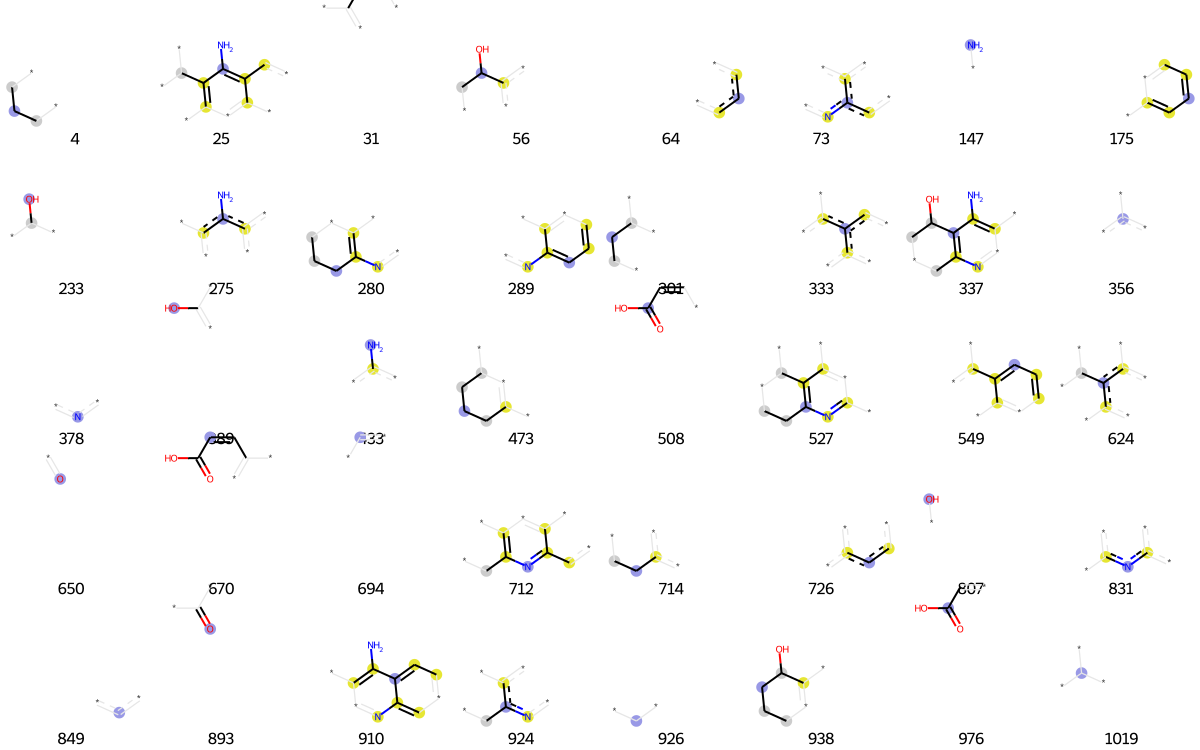

In [5132]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [5133]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[5,
 33,
 64,
 73,
 80,
 114,
 175,
 202,
 226,
 271,
 289,
 325,
 350,
 356,
 378,
 386,
 392,
 393,
 400,
 406,
 434,
 570,
 578,
 607,
 630,
 682,
 726,
 733,
 747,
 759,
 786,
 807,
 849,
 852,
 875,
 883,
 932,
 935,
 997]

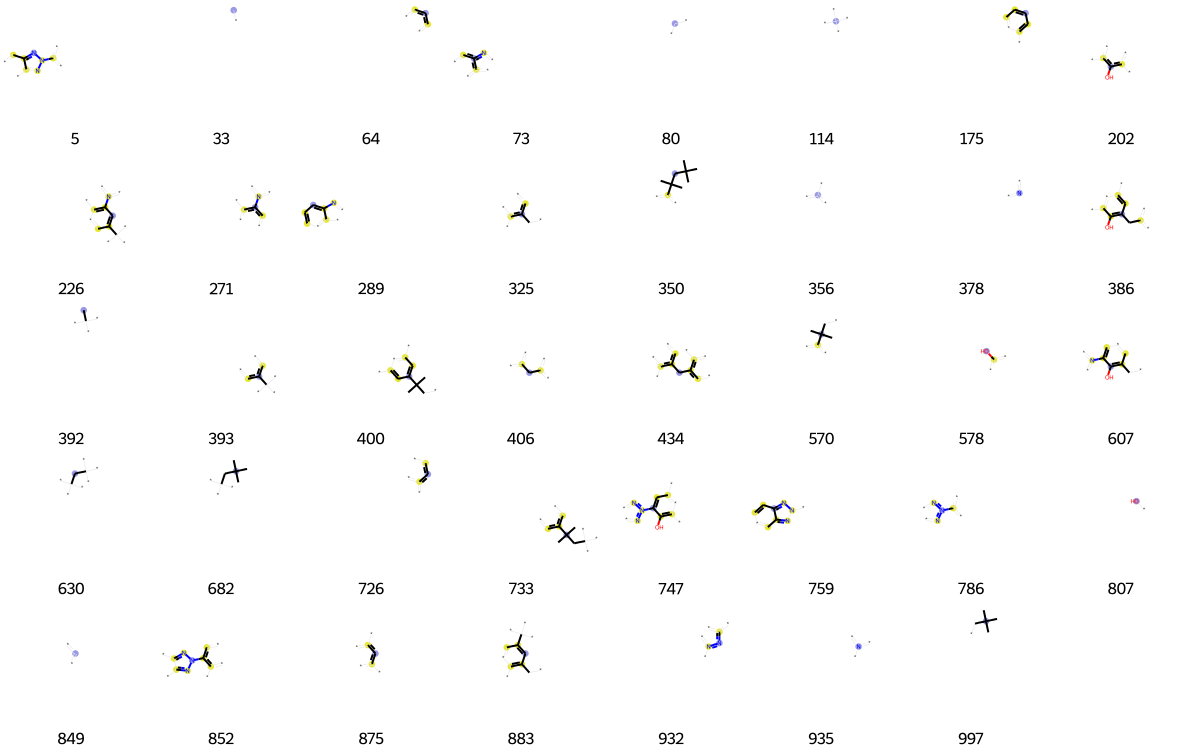

In [5134]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [5135]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[64,
 73,
 142,
 147,
 175,
 275,
 276,
 289,
 333,
 356,
 378,
 389,
 433,
 549,
 726,
 831,
 849,
 910]

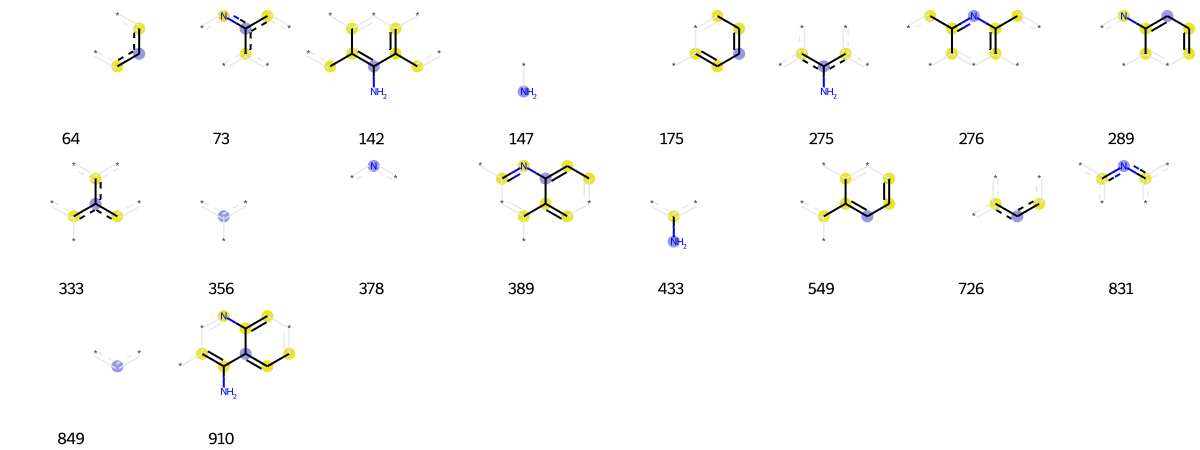

In [5136]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [5137]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[43,
 73,
 78,
 86,
 90,
 113,
 114,
 119,
 125,
 228,
 260,
 356,
 361,
 366,
 373,
 378,
 385,
 389,
 392,
 429,
 431,
 456,
 464,
 511,
 548,
 561,
 581,
 597,
 604,
 650,
 659,
 695,
 721,
 780,
 807,
 831,
 849,
 862,
 875,
 893,
 896,
 904,
 935,
 946,
 967,
 972,
 981]

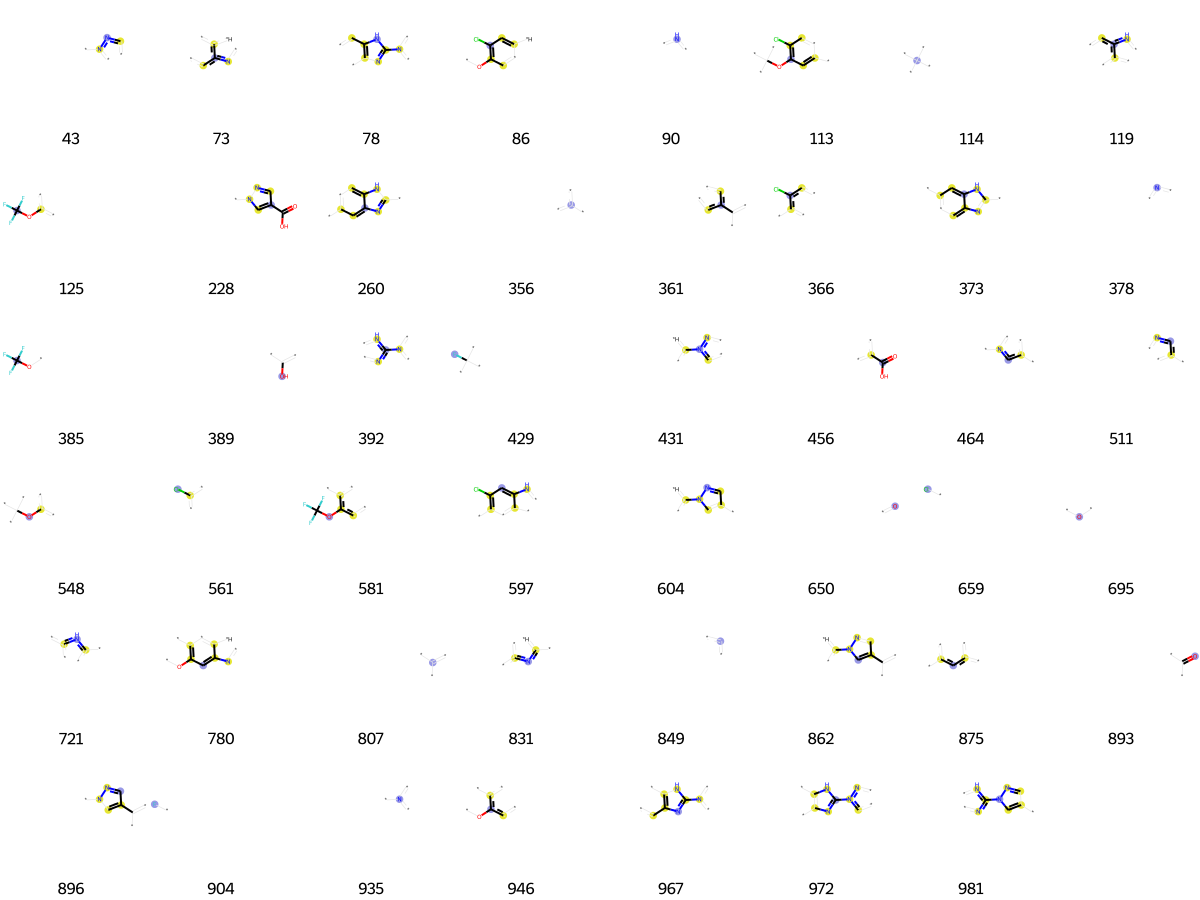

In [5138]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [5139]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[25,
 31,
 33,
 67,
 80,
 99,
 102,
 139,
 163,
 233,
 284,
 322,
 356,
 389,
 416,
 428,
 477,
 479,
 558,
 635,
 643,
 650,
 684,
 694,
 695,
 713,
 718,
 726,
 793,
 807,
 835,
 849,
 875,
 876,
 878,
 893,
 925,
 931,
 946,
 967,
 980,
 1009,
 1017]

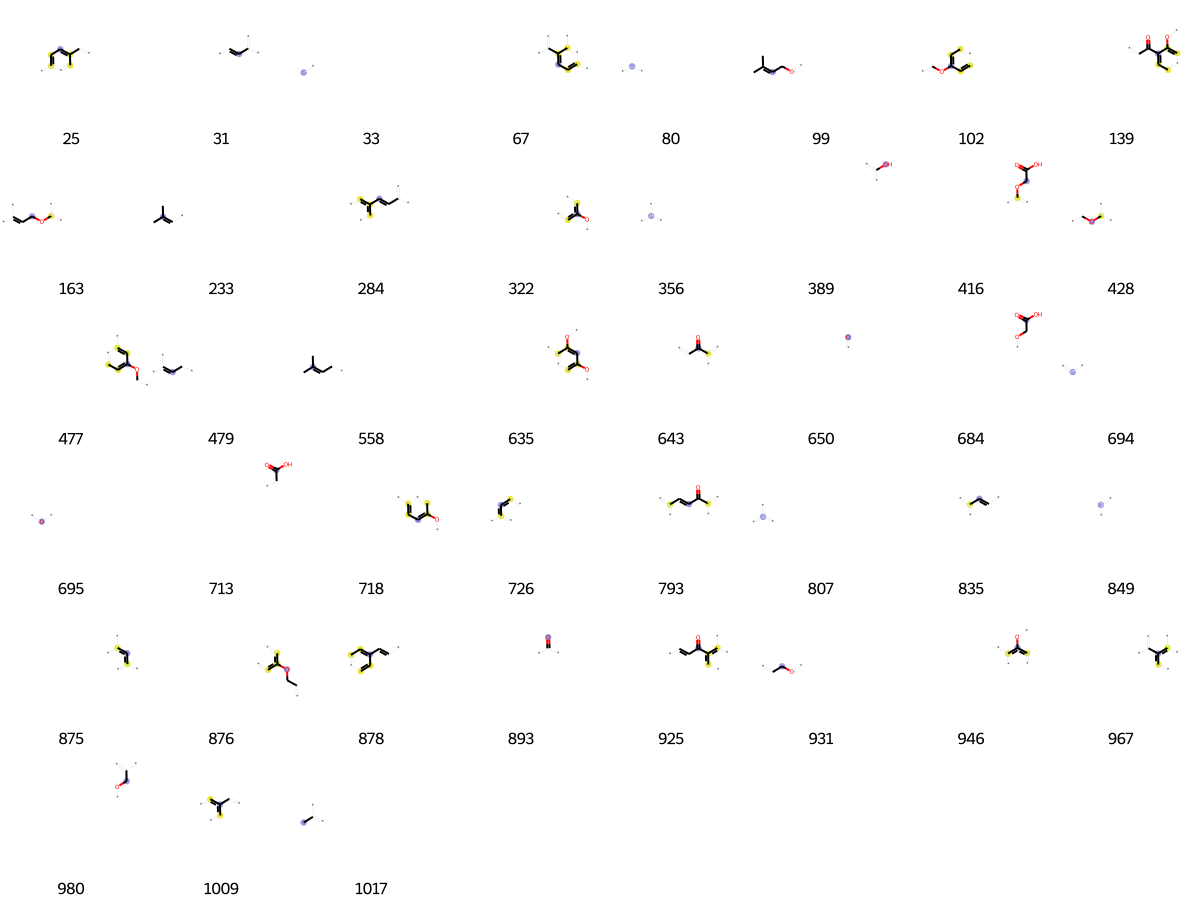

In [5140]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [5141]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[33,
 80,
 102,
 146,
 159,
 169,
 180,
 204,
 234,
 252,
 259,
 294,
 313,
 336,
 348,
 356,
 367,
 374,
 378,
 476,
 516,
 541,
 591,
 663,
 672,
 698,
 742,
 794,
 799,
 823,
 831,
 849,
 875,
 881,
 887,
 926,
 927,
 929,
 932,
 935,
 953,
 960,
 969,
 1021]

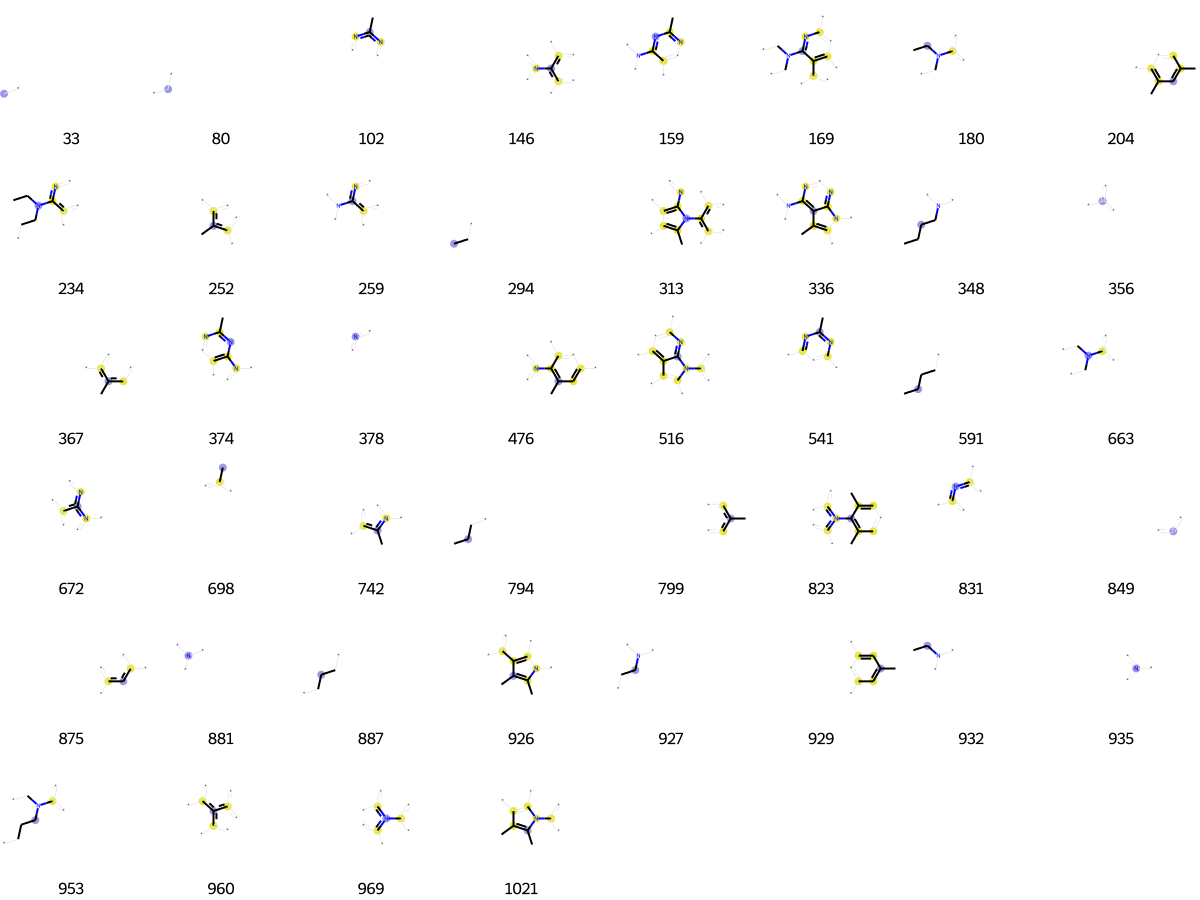

In [5142]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [5143]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[32,
 75,
 80,
 131,
 147,
 152,
 206,
 210,
 222,
 233,
 296,
 304,
 314,
 356,
 378,
 433,
 435,
 463,
 464,
 488,
 492,
 577,
 582,
 588,
 606,
 610,
 650,
 656,
 661,
 740,
 777,
 807,
 831,
 849,
 863,
 897,
 904,
 935,
 947,
 958,
 1019]

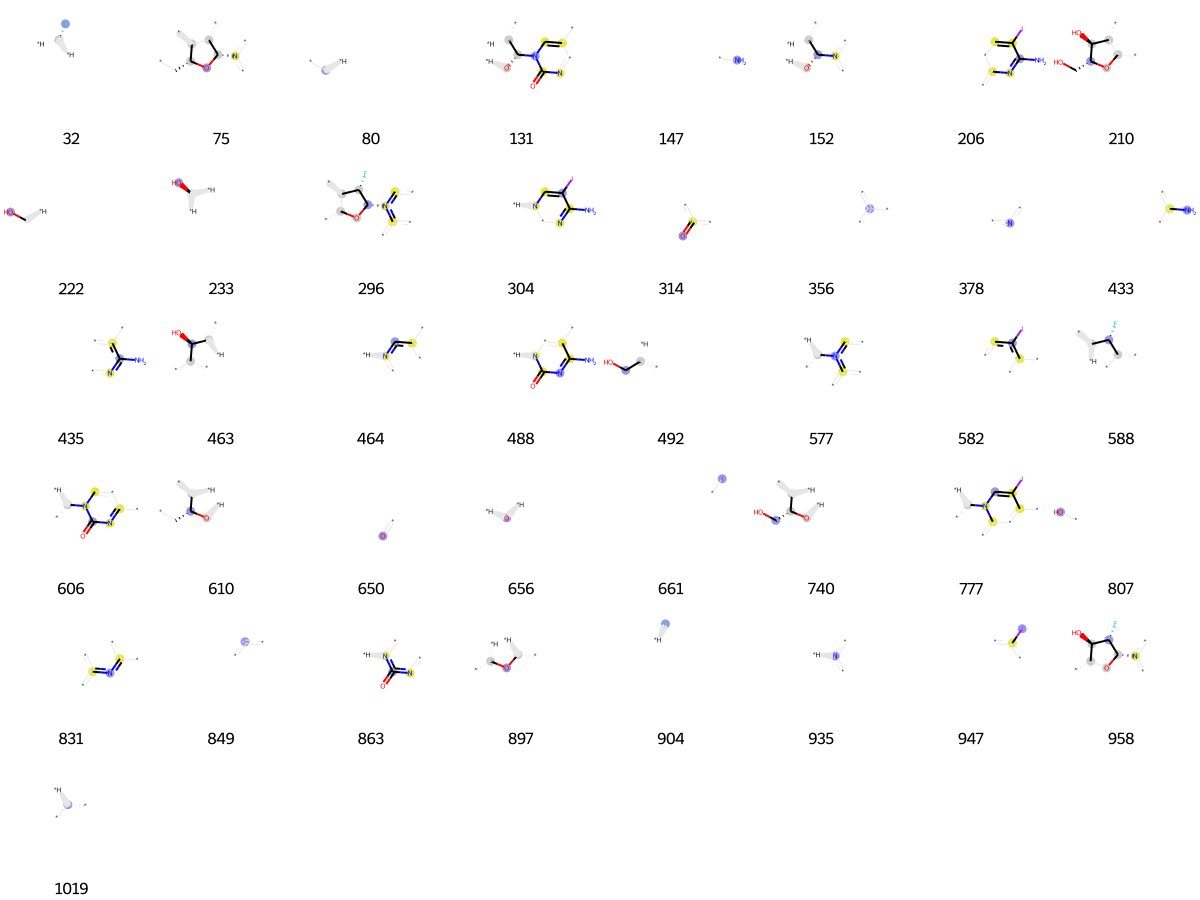

In [5144]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [5145]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[15,
 33,
 42,
 45,
 49,
 64,
 80,
 85,
 136,
 140,
 147,
 163,
 175,
 261,
 294,
 328,
 335,
 356,
 371,
 386,
 389,
 416,
 422,
 428,
 470,
 497,
 531,
 586,
 650,
 659,
 684,
 695,
 713,
 726,
 730,
 741,
 775,
 802,
 807,
 848,
 849,
 892,
 893,
 899,
 935,
 946,
 960,
 980]

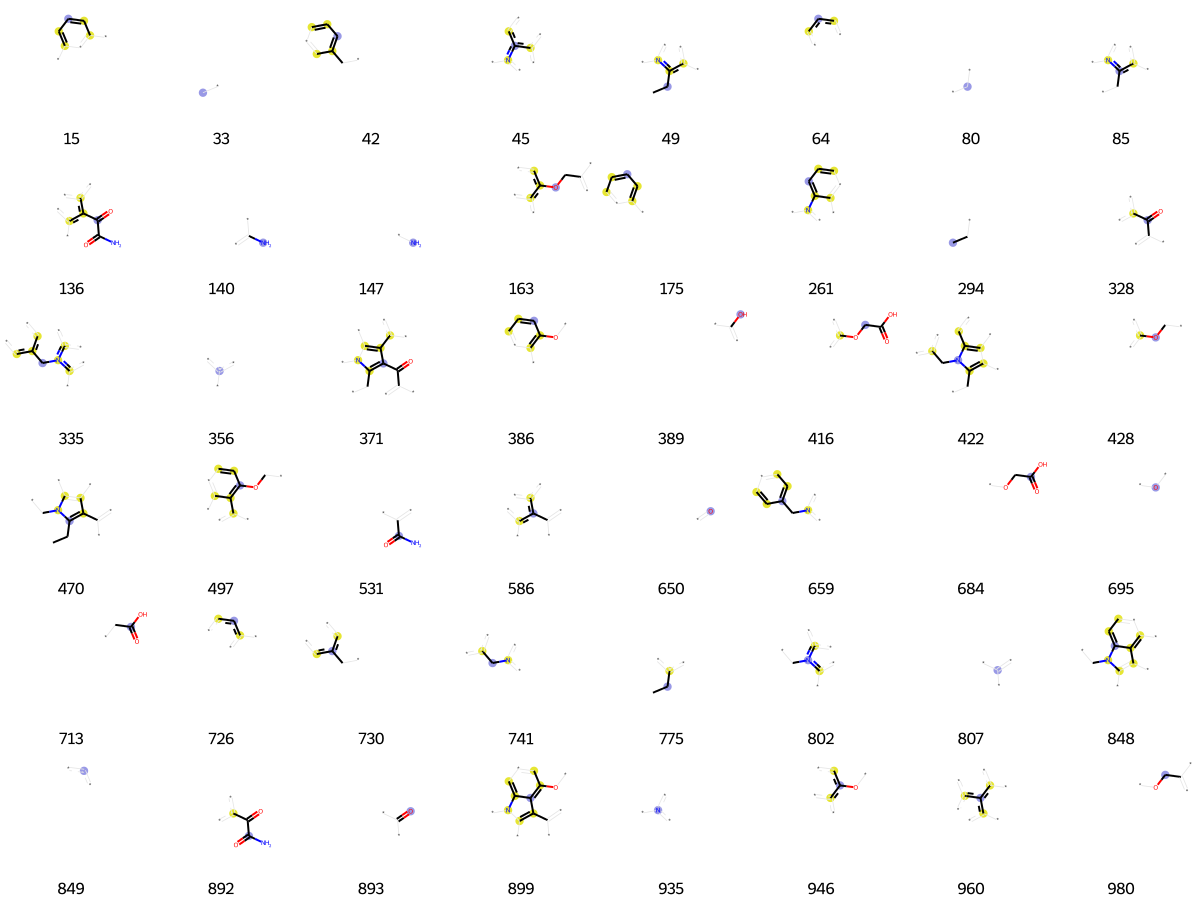

In [5146]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])